> ü©∫ Este notebook forma parte del proyecto **NutriSynthCare**, un entorno de simulaci√≥n sobre salud p√∫blica y recomendaciones nutricionales personalizadas.  
>
> üë• Desarrollado por:  
> - Daniel Cruz ‚Äì [dCruzCoding](https://github.com/dCruzCoding)  
> - An√≠bal Garc√≠a ‚Äì [Aniballll](https://github.com/Aniballll)  
>
> üìÅ Repositorio completo: [NutriSynthCare](https://github.com/dCruzCoding/NutriSynthCare)   
>
> üìú Licencia: Este proyecto est√° disponible bajo la licencia MIT. Consulta el archivo `LICENSE` para m√°s informaci√≥n.  
>
> üôè Agradecimientos especiales a todas las fuentes de datos y literatura cient√≠fica que han hecho posible la creaci√≥n de las bases sint√©ticas utilizadas en este proyecto.  
>
> ü§ù ¬øTe interesa colaborar? ¬°Est√°s invitado!  
> Puedes contribuir mejorando los notebooks, proponiendo nuevas ideas o corrigiendo errores:  
> - Haz un fork del repo  
> - Crea una rama (`git checkout -b mejora/nueva-idea`)  
> - Abre un Pull Request explicando tu propuesta


# =========================================================================
# ‚öôÔ∏è PIPELINE DE LA GENERACI√ìN DE LA BASE DE DATOS
# RIESGO CARDIOVASCULAR ‚ù§Ô∏è EN PERSONAS CON DIABETES ü©∏
# =========================================================================

```text
+---------------------------------+      +-----------------------------------------+
|    DB Sint√©tica 1: Diabetes     |      |  DB Sint√©tica 2: Riesgo Cardiovascular  |
+---------------------------------+      +-----------------------------------------+
             |                                              |
             '--------------------. .-----------------------'
                                  |
                                  v
                  +--------------------------------+
                  |    1. UNI√ìN DE BASES DE DATOS  |
                  |     (Outer Join por columnas   |
                  |           comunes)             |
                  +--------------------------------+
                                  |
                                  v
        +---------------------------------------------------------+
        |         Dataset Combinado con Valores Nulos (NaN)       |
        |  (Columnas exclusivas se rellenan con nulos para los    |
        |        registros que no tienen esa informaci√≥n)         |
        +---------------------------------------------------------+
                                  |
                                  v
          +----------------------------------------------------+
          |      2. IMPUTACI√ìN CON ML Y REDES NEURONALES       |
          |  (Se predicen y rellenan los valores NaN usando   |
          |       las otras columnas como predictores)        |
          +----------------------------------------------------+
                                  |
                                  v
                  +------------------------------------+
                  |      DATASET FINAL COMPLETO        |
                  | (Listo para an√°lisis y modelado)   |
                  +------------------------------------+

# Base de datos "precov_diabetes"

---

> ‚ö†Ô∏è Nota: Esta base de datos han sido definidas con fines educativos y simulativos, y no debe ser utilizada para sustituir datos cl√≠nicos reales sin validaci√≥n por parte de expertos en epidemiolog√≠a o salud p√∫blica.


Variables objetivo: Edad, a√±o de registro del paciente, IMC, diagn√≥stico de diabetes, niveles de insulina, niveles de glucosa (HbA1c), colesterol (perfil lipidico), frecuencia card√≠aca (o presi√≥n sangu√≠nea)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import truncnorm
import warnings

# Reproducibilidad
np.random.seed(42)

warnings.simplefilter(action='ignore', category=FutureWarning)


---

## üéØ Objetivo

Generar una distribuci√≥n realista de edades adultas para una muestra sint√©tica de poblaci√≥n espa√±ola, basada en datos previos a la pandemia, con el fin de usarla en simulaciones relacionadas con enfermedades cr√≥nicas como la diabetes tipo 2.

---

## üß† Justificaci√≥n te√≥rica

Para la variable **Edad**, nos basamos en estudios epidemiol√≥gicos realizados en poblaci√≥n adulta espa√±ola antes del COVID. A partir de estos, definimos una distribuci√≥n aproximada:

```
Edad:
  M√≠nimo = 21
  M√°ximo = 90
  Q1      = 35
  Mediana = 45
  Q3      = 55
  Media   = 50
  Desv. est√°ndar = 11
```

La elecci√≥n de una **distribuci√≥n normal truncada** permite simular adecuadamente una poblaci√≥n adulta, eliminando edades irrelevantes para el an√°lisis (por ejemplo, menores de edad o mayores de 90 a√±os), pero manteniendo la forma natural de una curva de campana.

---

## üß™ Fuentes bibliogr√°ficas

Los valores utilizados se alinean con los resultados de estudios realizados sobre diabetes en Espa√±a antes de la pandemia:

1. **Estudio [di@bet.es](mailto:di@bet.es) (2008‚Äì2010)**

   * Poblaci√≥n adulta espa√±ola (>18 a√±os).
   * Edad media pr√≥xima a 50 a√±os.
   * Prevalencia de diabetes tipo 2: 13,8 %.
   * Fuente: Soriguer F et al. *Diabetes Care*, 2012.

2. **Estudio SIMETAP-DM (hasta 2019)**

   * Comunidad de Madrid, n = 6.631 adultos.
   * Edad media: 55 a√±os (DE = 17,5).
   * Prevalencia de diabetes: 15,6 % en adultos; 30 % en mayores de 70 a√±os.
   * Fuente: L√≥pez-Simarro F et al. *Atenci√≥n Primaria*, 2020.

3. **Estudios auton√≥micos en Atenci√≥n Primaria**

   * Muestran una concentraci√≥n de casos entre los 40 y los 70 a√±os.
   * Edad media general oscila entre 50‚Äì56 a√±os dependiendo de la zona.
   * Fuente: Grupo de Estudio de Diabetes en Atenci√≥n Primaria de Salud (GEDAPS).

---

## üìå Conclusi√≥n

El rango y la forma de la distribuci√≥n elegida (media = 47, desviaci√≥n = 12, l√≠mites en 21 y 90) es coherente con la demograf√≠a de personas diagnosticadas o en riesgo de desarrollar diabetes tipo 2 en Espa√±a antes de la pandemia. As√≠, esta simulaci√≥n resulta v√°lida para estudios o prototipos que pretendan aproximarse a esa realidad poblacional.


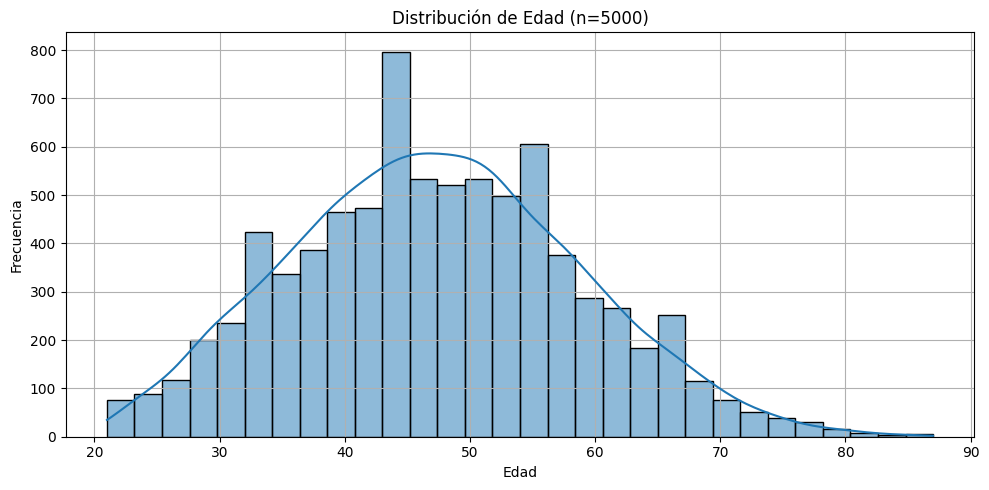

Edad
count  8000.000000
mean     47.256375
std      11.438641
min      21.000000
25%      39.000000
50%      47.000000
75%      55.000000
max      87.000000

In [2]:
# Par√°metros deseados para la variable Edad
n = 8000
mean_age = 47
std_age = 12
min_age = 21
max_age = 90

# Calcular los l√≠mites de truncamiento estandarizados
a, b = (min_age - mean_age) / std_age, (max_age - mean_age) / std_age

# Generar edades con distribuci√≥n normal truncada
edad = truncnorm.rvs(a, b, loc=mean_age, scale=std_age, size=n)

# Redondear a enteros
edad = np.round(edad).astype(int)

# Crear DataFrame
df_edad = pd.DataFrame({'Edad': edad})

# Estad√≠sticas descriptivas
descripcion = df_edad.describe()

# Histograma
plt.figure(figsize=(10, 5))
sns.histplot(df_edad['Edad'], bins=30, kde=True)
plt.title("Distribuci√≥n de Edad (n=5000)")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()

plt.show()

descripcion


## Asignaci√≥n del sexo por cuartiles de edad

Con el objetivo de generar una base de datos sint√©tica de pacientes con diabetes que resulte cl√≠nicamente realista, se ha optado por **asignar el sexo de los pacientes en funci√≥n de su grupo de edad (cuartil)**. Esta decisi√≥n se basa en datos epidemiol√≥gicos que evidencian diferencias en la prevalencia de la diabetes tipo 2 seg√∫n el sexo y la edad.

### üß† Justificaci√≥n cl√≠nica

Diversos estudios muestran que:

- En edades m√°s tempranas, la diabetes tipo 2 es m√°s frecuente en **hombres**, en parte por mayor prevalencia de obesidad visceral y factores de riesgo metab√≥licos.
- En edades avanzadas, la **supervivencia femenina** hace que el n√∫mero de mujeres con diabetes supere al de hombres.
- En edades intermedias, la prevalencia tiende a igualarse, aunque algunas fuentes muestran una ligera ventaja para las mujeres.

Por tanto, se ha optado por una asignaci√≥n que **refleja estas tendencias sin sobrerrepresentar un sexo en exceso**, proporcionando un equilibrio razonable entre realismo y simplicidad estad√≠stica.

### üìä Proporciones utilizadas

Las siguientes proporciones se han aplicado a cada cuartil de edad en la variable `Edad`:

| Cuartil de Edad | Rango aproximado (percentiles) | % Hombre | % Mujer |
|-----------------|-------------------------------|----------|---------|
| Q1              | 0‚Äì25%                         | 65%      | 35%     |
| Q2              | 25‚Äì50%                        | 60%      | 40%     |
| Q3              | 50‚Äì75%                        | 48%      | 52%     |
| Q4              | 75‚Äì100%                       | 45%      | 55%     |

Adem√°s, se ha creado una columna adicional `cuartil_edad` para facilitar an√°lisis posteriores basados en este criterio.

### üìö Bibliograf√≠a

- Guti√©rrez-Fisac, J.L., Royo-Bordonada, M.A., Banegas, J.R., & Rodr√≠guez-Artalejo, F. (2004). **Diabetes mellitus en Espa√±a: diferencias por sexo, edad y nivel educativo**. *Revista Espa√±ola de Salud P√∫blica*, 78(6), 547‚Äì558.  
  [https://scielo.isciii.es/pdf/resp/v78n6/original1.pdf](https://scielo.isciii.es/pdf/resp/v78n6/original1.pdf)

- Ministerio de Sanidad, Gobierno de Espa√±a. (2020). **Estrategia en diabetes del Sistema Nacional de Salud** (Actualizaci√≥n).  
  [https://www.sanidad.gob.es/organizacion/sns/planCalidadSNS/pdf/excelencia/diabetes/Estrategia_en_Diabetes_del_SNS_2021.pdf](https://www.sanidad.gob.es/organizacion/sns/planCalidadSNS/pdf/excelencia/diabetes/Estrategia_en_Diabetes_del_SNS_2021.pdf)

- International Diabetes Federation. (2021). **IDF Diabetes Atlas** (10th ed.).  
  [https://diabetesatlas.org/](https://diabetesatlas.org/)


In [3]:
df = df_edad.copy()

# Calcular cuartiles
q1 = df['Edad'].quantile(0.25)
q2 = df['Edad'].quantile(0.50)
q3 = df['Edad'].quantile(0.75)

# Crear variable 'Cuartil_Edad'
def asignar_cuartil(edad):
    if edad <= q1:
        return 'Q1'
    elif edad <= q2:
        return 'Q2'
    elif edad <= q3:
        return 'Q3'
    else:
        return 'Q4'

df['Cuartil_Edad'] = df['Edad'].apply(asignar_cuartil)
print("Variable 'Cuartil_Edad' creada con √©xito. Los cuartiles establecidos son:")
print(f"Q1: {q1}, Q2: {q2}, Q3: {q3}")

# Inicializar columna Sexo
df['Sexo'] = None

# Distribuci√≥n por cuartil
proporciones = {
    'Q1': {'Hombre': 0.65, 'Mujer': 0.35},
    'Q2': {'Hombre': 0.60, 'Mujer': 0.40},
    'Q3': {'Hombre': 0.48, 'Mujer': 0.52},
    'Q4': {'Hombre': 0.45, 'Mujer': 0.55},
}

# Asignar sexo por cuartil
for cuartil, props in proporciones.items():
    idx = df[df['Cuartil_Edad'] == cuartil].index
    n = len(idx)
    n_hombres = int(n * props['Hombre'])
    idx_hombres = np.random.choice(idx, size=n_hombres, replace=False)
    idx_mujeres = idx.difference(idx_hombres)
    
    df.loc[idx_hombres, 'Sexo'] = 'Hombre'
    df.loc[idx_mujeres, 'Sexo'] = 'Mujer'

# Revisar distribuci√≥n
sexo_distribution_porcentaje = df['Sexo'].value_counts(normalize=True) * 100
sexo_por_cuartil = df.groupby('Cuartil_Edad')['Sexo'].value_counts(normalize=True).unstack() * 100

display(df)

print("\nDistribuci√≥n de Sexo total:")
print(sexo_distribution_porcentaje)
print("\nDistribuci√≥n de Sexo por Cuartil:")
print(sexo_por_cuartil)


Variable 'Cuartil_Edad' creada con √©xito. Los cuartiles establecidos son:
Q1: 39.0, Q2: 47.0, Q3: 55.0


Edad Cuartil_Edad    Sexo
0       43           Q2   Mujer
1       67           Q4   Mujer
2       55           Q3   Mujer
3       50           Q3   Mujer
4       35           Q1   Mujer
...    ...          ...     ...
7995    40           Q2  Hombre
7996    38           Q1  Hombre
7997    46           Q2  Hombre
7998    63           Q4   Mujer
7999    33           Q1   Mujer

[8000 rows x 3 columns]


Distribuci√≥n de Sexo total:
Sexo
Hombre    54.775
Mujer     45.225
Name: proportion, dtype: float64

Distribuci√≥n de Sexo por Cuartil:
Sexo             Hombre      Mujer
Cuartil_Edad                      
Q1            64.995224  35.004776
Q2            59.980383  40.019617
Q3            47.989822  52.010178
Q4            44.952681  55.047319


# Variable DIABETES

La siguiente variable ser√° la variable categ√≥rica **DIABETES**, con la cual definiremos el diagn√≥stico de cada participante. Las opciones son:

* **DM1** (diabetes mellitus tipo 1)
* **DM2** (diabetes mellitus tipo 2)
* **Gestacional**
* **Sin diabetes**

Para definir su distribuci√≥n, se han considerado tendencias epidemiol√≥gicas reportadas en Espa√±a y Europa:

* **Diabetes tipo 1 (DM1):** Representa aproximadamente un 5-10% de los casos de diabetes. Suele aparecer en edades tempranas (infancia, adolescencia o adultez joven) y es algo m√°s com√∫n en hombres (Soriguer et al., 2012; Sociedad Espa√±ola de Diabetes, 2020).

* **Diabetes tipo 2 (DM2):** Constituye entre el 85-90% de los casos de diabetes. Su incidencia aumenta con la edad y se relaciona con factores de riesgo como obesidad, sedentarismo y antecedentes familiares. Tiene mayor prevalencia en hombres hasta los 75 a√±os, a partir de lo cual se iguala o invierte (IDIBAPS, 2021; SED, 2020).

* **Diabetes gestacional:** Se diagnostica en mujeres embarazadas, usualmente entre los 20 y 40 a√±os. En Espa√±a, afecta entre el 5 y el 10% de los embarazos, dependiendo de la comunidad aut√≥noma y los criterios diagn√≥sticos (Grupo Espa√±ol de Diabetes y Embarazo, 2015; SED, 2020). Por tanto, esta categor√≠a se restringe exclusivamente a mujeres en edad f√©rtil (cuartiles Q1 y Q2).

* **Sin diabetes:** M√°s com√∫n en poblaci√≥n joven y mujeres, dado el menor riesgo general en estas franjas (Estudio [di@bet.es](mailto:di@bet.es), 2012).

---

### Matriz de probabilidades seg√∫n edad, sexo y tipo de diabetes

| Cuartil Edad | Sexo   | Prob DM1 | Prob DM2 | Prob Gestacional | Prob Sin diabetes |
| ------------ | ------ | -------- | -------- | ---------------- | ----------------- |
| Q1           | Hombre | 0.35     | 0.25     | 0.00             | 0.40              |
| Q1           | Mujer  | 0.25     | 0.18     | 0.15             | 0.42              |
| Q2           | Hombre | 0.20     | 0.55     | 0.00             | 0.25              |
| Q2           | Mujer  | 0.15     | 0.45     | 0.10             | 0.30              |
| Q3           | Hombre | 0.10     | 0.65     | 0.00             | 0.25              |
| Q3           | Mujer  | 0.08     | 0.60     | 0.00             | 0.32              |
| Q4           | Hombre | 0.08     | 0.70     | 0.00             | 0.22              |
| Q4           | Mujer  | 0.05     | 0.68     | 0.00             | 0.27              |


-> Para los prob gestacional no solamente es de gestacional a esa edad si no tmbn hay que tener en cuenta la prob de embarazo a esa edad.

---

### Referencias

* Soriguer, F., et al. (2012). *Prevalencia de la diabetes mellitus y otras alteraciones del metabolismo de la glucosa en Espa√±a: el estudio [di@bet.es](mailto:di@bet.es)*. Diabetolog√≠a, 55(1), 88‚Äì93. [https://doi.org/10.1007/s00125-011-2336-2](https://doi.org/10.1007/s00125-011-2336-2)
* Sociedad Espa√±ola de Diabetes (SED). (2020). *Informe anual sobre diabetes en Espa√±a*. [https://www.sediabetes.org](https://www.sediabetes.org)
* Grupo Espa√±ol de Diabetes y Embarazo (GEDE). (2015). *Recomendaciones para el diagn√≥stico y tratamiento de la diabetes gestacional*. Revista Cl√≠nica Espa√±ola, 215(9), 476‚Äì483.
* IDIBAPS - Hospital Cl√≠nic de Barcelona. (2021). *Epidemiolog√≠a de la diabetes tipo 2 en Espa√±a*.
* Instituto de Salud Carlos III. (2020). *Encuesta Nacional de Salud de Espa√±a*. [https://www.sanidad.gob.es/estadEstudios/estadisticas/encuestaNacional/](https://www.sanidad.gob.es/estadEstudios/estadisticas/encuestaNacional/)
* Ministerio de Sanidad. (2022). *Estrategia en Diabetes del Sistema Nacional de Salud*. [https://www.sanidad.gob.es/organizacion/sns/planCalidadSNS/pdf/Estrategia\_Diabetes.pdf](https://www.sanidad.gob.es/organizacion/sns/planCalidadSNS/pdf/Estrategia_Diabetes.pdf)


In [4]:
# Diccionario de probabilidades
probabilidades = {  #  Tipo1 Tipo2 Gest No diab
    ('Q1', 'Hombre'): [0.35, 0.25, 0.00, 0.40],
    ('Q1', 'Mujer') : [0.25, 0.18, 0.15, 0.42],
    ('Q2', 'Hombre'): [0.20, 0.55, 0.00, 0.25],
    ('Q2', 'Mujer') : [0.15, 0.45, 0.10, 0.30],
    ('Q3', 'Hombre'): [0.10, 0.65, 0.00, 0.25],
    ('Q3', 'Mujer') : [0.08, 0.60, 0.00, 0.32],
    ('Q4', 'Hombre'): [0.08, 0.70, 0.00, 0.22],
    ('Q4', 'Mujer') : [0.05, 0.68, 0.00, 0.27],
}

tipos_diabetes = ['Tipo 1', 'Tipo 2', 'Gestacional', 'No diabetes']

# Funci√≥n para asignar tipo de diabetes
def asignar_diabetes(cuartil, sexo):
    probs = probabilidades.get((cuartil, sexo), [0.20, 0.50, 0.10, 0.20])
    probs = np.array(probs)
    probs = probs / probs.sum()  # Normalizar para asegurar suma 1
    # print(f"Asignando diabetes para ({cuartil}, {sexo}) con probabilidades: {probs}")
    return np.random.choice(tipos_diabetes, p=probs)

df["Tipo_Diabetes"] = df.apply(lambda row: asignar_diabetes(row["Cuartil_Edad"], row["Sexo"]), axis=1)

# Estad√≠sticas
conteo = df['Tipo_Diabetes'].value_counts()
porcentajes = (conteo / len(df) * 100).round(2)

# Mostrar valores de tipos de diabetes seg√∫n cuartil y sexo
diabetes_por_cuartil_sexo = df.groupby(['Cuartil_Edad', 'Sexo', 'Tipo_Diabetes']).size().unstack(fill_value=0)
print("\nDistribuci√≥n de tipos de diabetes por cuartil y sexo:")
print(diabetes_por_cuartil_sexo)


Distribuci√≥n de tipos de diabetes por cuartil y sexo:
Tipo_Diabetes        Gestacional  No diabetes  Tipo 1  Tipo 2
Cuartil_Edad Sexo                                            
Q1           Hombre            0          567     465     329
             Mujer           110          300     188     135
Q2           Hombre            0          329     248     646
             Mujer            87          243     118     368
Q3           Hombre            0          248      95     600
             Mujer             0          346      79     597
Q4           Hombre            0          188      66     601
             Mujer             0          296      50     701


### Definici√≥n de la variable IMC

A continuaci√≥n, se definen los rangos, medias y desviaciones est√°ndar utilizadas para simular el √çndice de Masa Corporal (IMC) de forma realista, en funci√≥n del diagn√≥stico de diabetes. La simulaci√≥n tiene en cuenta factores como **sexo** y **edad** (o cuartil de edad), para generar valores plausibles y √∫tiles para an√°lisis posteriores.

| Diagn√≥stico     | IMC m√≠nimo | IMC m√°ximo | Media ajustada | STD | Justificaci√≥n                                                                                                                                                                                                                                                                                                          |
| --------------- | ---------- | ---------- | -------------- | --- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **No diabetes** | 17.0       | 35.0       | **22.5**       | 2.5 | Seg√∫n datos del **Estudio ENRICA** y la **Encuesta Nacional de Salud de Espa√±a (ENSE 2020)**, el IMC saludable en poblaci√≥n adulta espa√±ola est√° en torno a 22-24, con un rango habitual de 18.5 a 30 para no diab√©ticos. Casos de obesidad severa sin diabetes son menos frecuentes.                                  |
| **Tipo 1**      | 18.5       | 38.0       | **24.0**       | 3.0 | Estudios espa√±oles como los de la **Red Espa√±ola de Diabetes (REDIAPP)** muestran que personas con diabetes tipo 1 presentan generalmente un IMC dentro de rangos normales o moderadamente elevados, con baja prevalencia de obesidad severa.                                                                          |
| **Tipo 2**      | 24.0       | 48.0       | **33.0**       | 4.0 | La relaci√≥n entre obesidad y diabetes tipo 2 en Espa√±a est√° bien documentada en informes del **Ministerio de Sanidad** y en la **Gu√≠a de pr√°ctica cl√≠nica sobre diabetes tipo 2 en atenci√≥n primaria (SEMERGEN)**, donde el IMC medio en pacientes con DM2 suele superar 30, con muchos casos en obesidad tipo I y II. |
| **Gestacional** | 22.0       | 38.0       | **28.0**       | 3.5 | La diabetes gestacional en Espa√±a est√° asociada a sobrepeso u obesidad moderada previa al embarazo, seg√∫n estudios nacionales como los publicados por la **Sociedad Espa√±ola de Ginecolog√≠a y Obstetricia (SEGO)** y la **Gu√≠a NICE adaptada al contexto espa√±ol**. El IMC bajo (<22) es infrecuente en este grupo.    |

---

### Consideraciones adicionales

* **OMS (2024)** clasifica el IMC de la siguiente manera:

  * Bajo peso: IMC < 18.5
  * Normal: 18.5 ‚Äì 24.9
  * Sobrepeso: 25.0 ‚Äì 29.9
  * Obesidad tipo I: 30.0 ‚Äì 34.9
  * Obesidad tipo II: 35.0 ‚Äì 39.9
  * Obesidad tipo III: ‚â• 40.0

* **Edad**: el IMC tiende a aumentar ligeramente con la edad, especialmente entre los 30 y 60 a√±os. Se introduce un ajuste progresivo por cuartiles o directamente en funci√≥n de la edad continua.

* **Sexo**:

  * En promedio, los **hombres** tienden a tener un IMC ligeramente m√°s alto que las mujeres.
  * Las **mujeres** tienen, en general, m√°s porcentaje de grasa corporal a igual IMC, pero eso no se refleja directamente en el √≠ndice, as√≠ que el ajuste es solo leve (¬±0.5).

-- 

### Referencias

* **Estudio ENRICA (2015-2018):** Encuesta nacional sobre riesgo cardiovascular y obesidad en poblaci√≥n adulta espa√±ola.
* **Encuesta Nacional de Salud de Espa√±a (ENSE 2020):** Datos de prevalencia de obesidad y diabetes.
* **Red Espa√±ola de Diabetes (REDIAPP):** Estudios epidemiol√≥gicos sobre diabetes tipo 1 y tipo 2 en Espa√±a.
* **Gu√≠a de pr√°ctica cl√≠nica SEMERGEN (2022):** Diabetes tipo 2 en atenci√≥n primaria.
* **Sociedad Espa√±ola de Ginecolog√≠a y Obstetricia (SEGO):** Recomendaciones y estudios sobre diabetes gestacional.
* **Gu√≠a NICE adaptada para Espa√±a (2019):** Manejo de diabetes gestacional y recomendaciones nutricionales.
* **Ministerio de Sanidad, Consumo y Bienestar Social:** Informes epidemiol√≥gicos y estad√≠sticas sobre diabetes y obesidad.


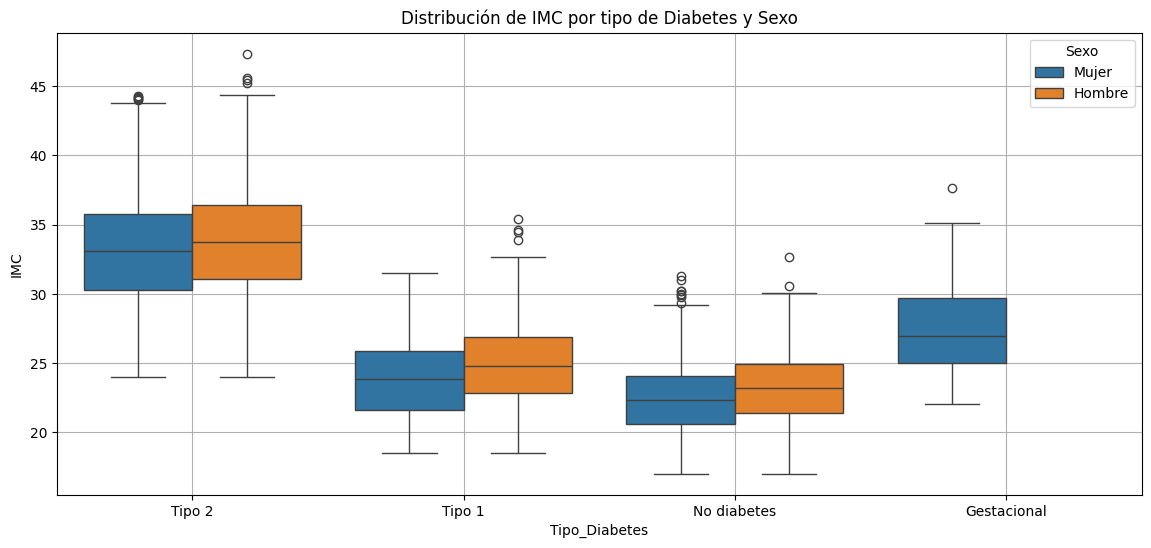


üìä Resumen de IMC por tipo de diabetes y cuartil de edad:
                             mean   min    max
Tipo_Diabetes Cuartil_Edad                    
Gestacional   Q1            27.29  22.0  37.64
              Q2            27.21  22.0  34.71
No diabetes   Q1            22.42  17.0  29.84
              Q2            22.89  17.0  32.68
              Q3            22.91  17.0  31.28
              Q4            23.27  17.0  30.56
Tipo 1        Q1            24.22  18.5  35.44
              Q2            24.57  18.5  34.59
              Q3            24.75  18.5  34.44
              Q4            25.02  18.5  33.90
Tipo 2        Q1            32.90  24.0  42.48
              Q2            33.34  24.0  45.43
              Q3            33.42  24.0  47.37
              Q4            33.81  24.0  45.61


In [5]:
def generar_imc(diagnostico, cuartil_edad=None, sexo='Mujer', edad=None):
    # Ajustes por diagn√≥stico
    base = {
        'No diabetes':     {'media': 22.5, 'std': 2.5, 'min': 17.0, 'max': 35.0},
        'Tipo 1': {'media': 24.0, 'std': 3.0, 'min': 18.5, 'max': 38.0},
        'Tipo 2': {'media': 33.0, 'std': 4.0, 'min': 24.0, 'max': 48.0},
        'Gestacional': {'media': 28.0, 'std': 3.5, 'min': 22.0, 'max': 38.0},
    }

    valores = base.get(diagnostico, base['No diabetes'])
    media = valores['media']
    std = valores['std']
    imc_min = valores['min']
    imc_max = valores['max']

    # Ajustes por edad (cuartil o continua)
    if edad is not None:
        media += 0.04 * (edad - 40)  # 0.04 por a√±o por encima/por debajo de 40
    elif cuartil_edad:
        media += {'Q1': -1.0, 'Q2': -0.3, 'Q3': 0.3, 'Q4': 1.0}.get(cuartil_edad, 0.0)

    # Ajustes por sexo
    if sexo == 'Hombre':
        media += 0.5
    elif sexo == 'Mujer':
        media -= 0.5

    # IMC generado con ruido gaussiano
    imc = np.random.normal(media, std)
    return np.clip(imc, imc_min, imc_max)


# Con edad num√©rica
df['IMC'] = df.apply(lambda row: generar_imc(row['Tipo_Diabetes'], sexo=row['Sexo'], edad=row['Edad']), axis=1)

# Boxplot: IMC por tipo de diabetes y sexo
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Tipo_Diabetes', y='IMC', hue='Sexo')
plt.title('Distribuci√≥n de IMC por tipo de Diabetes y Sexo')
plt.ylabel('IMC')
plt.grid(True)
plt.show()


# ---------- RES√öMENES CLAROS ----------

# 2. IMC por tipo de diabetes y cuartil de edad
print("\nüìä Resumen de IMC por tipo de diabetes y cuartil de edad:")
print(df.groupby(['Tipo_Diabetes', 'Cuartil_Edad'])['IMC'].agg(['mean', 'min', 'max']).round(2))




## Incluyendo variable de glucosa en sangre: HbA1c

ü©∏ Variable: HbA1c (hemoglobina glicosilada)
La hemoglobina glicosilada (HbA1c) refleja el promedio de glucosa en sangre en los √∫ltimos 2‚Äì3 meses, siendo un marcador recomendado internacionalmente para el diagn√≥stico y control de la diabetes mellitus. Se expresa como porcentaje (%), y sus valores aumentan de forma sostenida cuando hay hiperglucemia cr√≥nica.

üìå Justificaci√≥n para generaci√≥n de HbA1c sint√©tica
La HbA1c es un marcador clave para el diagn√≥stico y seguimiento de la diabetes, reflejando el control gluc√©mico promedio en los √∫ltimos meses. El valor diagn√≥stico general es HbA1c ‚â• 6.5% para diabetes, pero la media y dispersi√≥n var√≠an seg√∫n tipo de diabetes y caracter√≠sticas cl√≠nicas como el IMC.

| Diagn√≥stico       | Rango de HbA1c (%) | Interpretaci√≥n cl√≠nica                                    |
| ----------------- | ------------------ | --------------------------------------------------------- |
| Normal            | < 5.7              | Sin alteraci√≥n gluc√©mica                                  |
| Prediabetes       | 5.7 ‚Äì 6.4          | Riesgo elevado de desarrollar diabetes tipo 2             |
| Diabetes mellitus | ‚â• 6.5              | Diagn√≥stico confirmado (en dos mediciones o con s√≠ntomas) |

Fuente: American Diabetes Association (2024) [2], OMS Guidelines (2020) [3]

Seg√∫n referencias del notebooklm... (revisar nota "Valores t√≠picos de HbA1c y su relaci√≥n con IMC")

* En diabetes tipo 2 (DM2), la HbA1c media reportada ronda entre 7.1% y 7.2%, con una tendencia clara: a mayor IMC, mayor HbA1c media y menor proporci√≥n de pacientes con buen control gluc√©mico.

* En diabetes tipo 1 (DM1), cohortes espec√≠ficas reportan medias algo m√°s bajas, alrededor de 6.7%, aunque mantener control estricto es complejo.

* En personas sin diabetes, la HbA1c t√≠picamente se sit√∫a entre 4.5% y 5.6%, con valores m√°s altos indicando prediabetes o diabetes no diagnosticada.

* En diabetes **gestacional**, la HbA1c suele elevarse ligeramente respecto a personas sin diabetes, t√≠picamente con medias alrededor de 6.0% y menor variabilidad que en DM1 o DM2. Este aumento refleja alteraciones transitorias en el metabolismo gluc√≠dico durante el embarazo, con valores que suelen normalizarse tras el parto. Referencias espec√≠ficas son m√°s limitadas pero coinciden en un rango aproximado entre 4.8% y 7.5%.

Por tanto, al generar datos sint√©ticos, el rango y media de HbA1c deben reflejar estas diferencias, ajust√°ndose adem√°s en DM2 por el IMC para simular esa correlaci√≥n cl√≠nica observada.

1. World Health Organization (2020). Use of glycated haemoglobin (HbA1c) in the diagnosis of diabetes mellitus. Geneva: WHO.
2. American Diabetes Association (2024). Standards of Medical Care in Diabetes‚Äî2024. Diabetes Care, 47(Suppl. 1).
3. International Diabetes Federation (2021). IDF Diabetes Atlas, 10th edition.

---

#### Notas adicionales con referencias espa√±olas

1. La DM1, que es una enfermedad autoinmune que causa una deficiencia absoluta de insulina lo que dificulta el control gluc√©mico a pesar de la terapia con insulina ex√≥gena, tiene una mayor variabilidad y, en promedio, valores m√°s elevados de HbA1c. En estudios espa√±oles, la media de HbA1c en DM1 suele situarse alrededor de 7.5-7.6% con una desviaci√≥n est√°ndar amplia, reflejando el desaf√≠o de mantener un control √≥ptimo. Referencia: Gu√≠a SEEN-SED 2021 sobre Diabetes Tipo 1
2. La DM2 se caracteriza por resistencia a la insulina y d√©ficit relativo de producci√≥n. La mayor√≠a de pacientes presentan sobrepeso u obesidad, factores que empeoran el control gluc√©mico. La HbA1c media suele ser algo menor que en DM1 (alrededor de 7.1-7.2%), pero con una dispersi√≥n importante asociada a la heterogeneidad de la enfermedad y el tratamiento. Referencia: Estudio [Di@bet.es](mailto:Di@bet.es), Espa√±a
3. Sin diabetes: En poblaci√≥n sin diabetes, la HbA1c media est√° en torno al 5.2%, con baja variabilidad. Mismas referencias.
4. Gestacional: Valores t√≠picos de HbA1c en diabetes gestacional se encuentran entre 5.5% y 6.5%, reflejando alteraci√≥n gluc√©mica moderada y transitoria durante el embarazo, con valores m√°ximos en torno a 7.5%. Se recomienda monitorizar estrechamente para evitar complicaciones maternas y fetales. Referencias: literatura cl√≠nica y gu√≠as internacionales (ADA, OMS).

---

**Referencias**

1. World Health Organization (2020). Use of glycated haemoglobin (HbA1c) in the diagnosis of diabetes mellitus. Geneva: WHO.
2. American Diabetes Association (2024). Standards of Medical Care in Diabetes‚Äî2024. Diabetes Care, 47(Suppl. 1).
3. International Diabetes Federation (2021). IDF Diabetes Atlas, 10th edition.
4. Gu√≠a SEEN-SED 2021 sobre Diabetes Tipo 1
5. Estudio [Di@bet.es](mailto:Di@bet.es), Espa√±a
6. Literatura cl√≠nica sobre diabetes gestacional
7. OMS Guidelines (2020)

(Incluimos referencias 1,7,23,16,12 del notebooklm)


--- Estad√≠sticas HbA1c por Tipo de Diabetes ---
                count      mean       std  min       25%       50%       75%  \
Tipo_Diabetes                                                                  
Gestacional     197.0  6.109764  0.495767  4.8  5.785122  6.125852  6.438458   
No diabetes    2517.0  5.226098  0.297642  4.5  5.022316  5.225620  5.432326   
Tipo 1         1309.0  7.620486  1.135173  5.5  6.834852  7.630540  8.340304   
Tipo 2         3977.0  7.569874  1.012850  5.5  6.854276  7.552510  8.263438   

                     max  
Tipo_Diabetes             
Gestacional     7.496631  
No diabetes     6.000000  
Tipo 1         11.372113  
Tipo 2         11.000000  

--- Estad√≠sticas HbA1c por Tipo de Diabetes y Sexo ---
                       count      mean       std  min       25%       50%  \
Tipo_Diabetes Sexo                                                          
Gestacional   Mujer    197.0  6.109764  0.495767  4.8  5.785122  6.125852   
No diabetes   Hombr

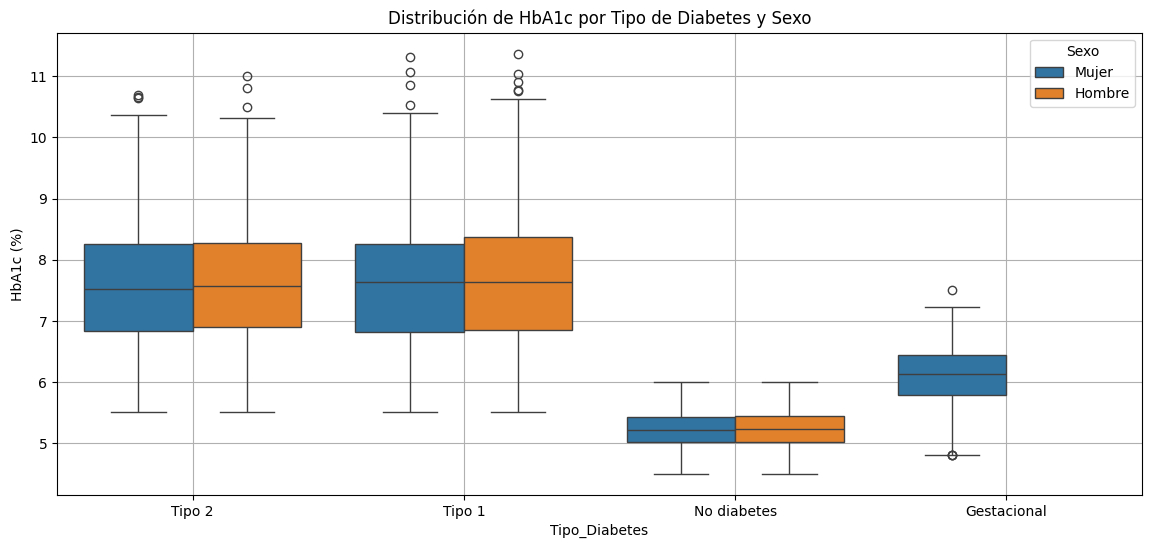

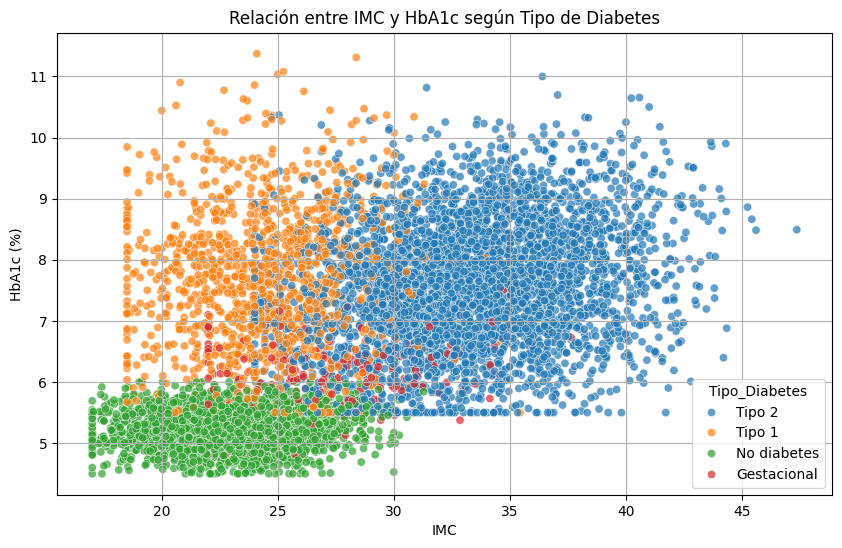

In [6]:
def generar_hba1c(tipo_diabetes, imc):
    # Par√°metros base seg√∫n tipo de diabetes (valores basados en estudios espa√±oles)
    base = {
        'No diabetes': {'media': 5.2, 'std': 0.3, 'min': 4.5, 'max': 6.0},
        'Tipo 1': {'media': 7.55, 'std': 1.2, 'min': 5.5, 'max': 12.0},
        'Tipo 2': {'media': 7.15, 'std': 1.0, 'min': 5.5, 'max': 11.0},
        'Gestacional': {'media': 6.0, 'std': 0.5, 'min': 4.8, 'max': 7.5},
    }

    params = base.get(tipo_diabetes, base['No diabetes'])
    media = params['media']
    std = params['std']
    hba1c_min = params['min']
    hba1c_max = params['max']

    # Ajuste lineal simple: a mayor IMC, mayor HbA1c (peque√±o efecto)
    # Por cada punto de IMC por encima de 25, subimos 0.05 en HbA1c
    if imc > 25:
        media += 0.05 * (imc - 25)

    # Generar valor HbA1c con distribuci√≥n normal (RUIDO)
    hba1c = np.random.normal(media, std)

    # Limitar a rangos plausibles
    return np.clip(hba1c, hba1c_min, hba1c_max)


# A√±adir la variable HbA1c al dataframe
df['HbA1c'] = df.apply(lambda row: generar_hba1c(row['Tipo_Diabetes'], row['IMC']), axis=1)

# Estad√≠sticas descriptivas agrupadas

print("\n--- Estad√≠sticas HbA1c por Tipo de Diabetes ---")
print(df.groupby('Tipo_Diabetes')['HbA1c'].describe())

print("\n--- Estad√≠sticas HbA1c por Tipo de Diabetes y Sexo ---")
print(df.groupby(['Tipo_Diabetes', 'Sexo'])['HbA1c'].describe())

print("\n--- Estad√≠sticas HbA1c por Tipo de Diabetes y Cuartil de Edad ---")
print(df.groupby(['Tipo_Diabetes', 'Cuartil_Edad'])['HbA1c'].describe())

# Visualizaciones

# Boxplot HbA1c por tipo de diabetes y sexo
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Tipo_Diabetes', y='HbA1c', hue='Sexo')
plt.title('Distribuci√≥n de HbA1c por Tipo de Diabetes y Sexo')
plt.ylabel('HbA1c (%)')
plt.grid(True)
plt.show()

# Scatterplot HbA1c vs IMC, coloreado por tipo de diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='IMC', y='HbA1c', hue='Tipo_Diabetes', alpha=0.7)
plt.title('Relaci√≥n entre IMC y HbA1c seg√∫n Tipo de Diabetes')
plt.xlabel('IMC')
plt.ylabel('HbA1c (%)')
plt.grid(True)
plt.show()


Vamos a a√±adir un analisis de correlaciones para tener m√°s claro la relacion entre las variables.

Matriz de correlaci√≥n:
                            IMC     HbA1c  Diabetes_Gestacional  \
IMC                   1.000000  0.553290             -0.032283   
HbA1c                 0.553290  1.000000             -0.079077   
Diabetes_Gestacional -0.032283 -0.079077              1.000000   
Diabetes_No diabetes -0.635484 -0.765909             -0.107655   
Diabetes_Tipo 1      -0.294126  0.258345             -0.070279   
Diabetes_Tipo 2       0.817830  0.544703             -0.157981   

                      Diabetes_No diabetes  Diabetes_Tipo 1  Diabetes_Tipo 2  
IMC                              -0.635484        -0.294126         0.817830  
HbA1c                            -0.765909         0.258345         0.544703  
Diabetes_Gestacional             -0.107655        -0.070279        -0.157981  
Diabetes_No diabetes              1.000000        -0.299679        -0.673651  
Diabetes_Tipo 1                  -0.299679         1.000000        -0.439772  
Diabetes_Tipo 2                  -0.67

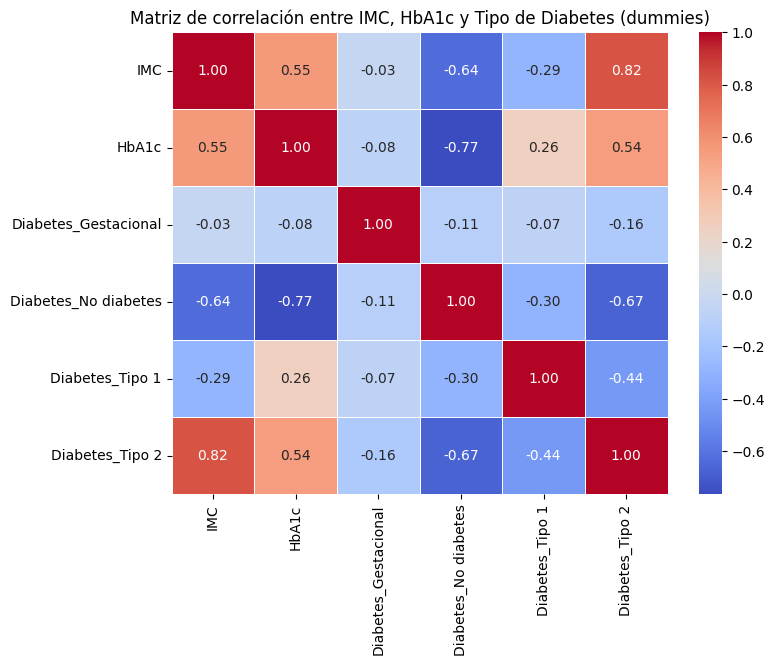


--- Correlaciones IMC vs HbA1c por Tipo de Diabetes ---
Diagn√≥stico: Tipo 2 | N=3977 | Correlaci√≥n IMC-HbA1c: 0.218
Diagn√≥stico: Tipo 1 | N=1309 | Correlaci√≥n IMC-HbA1c: 0.043
Diagn√≥stico: No diabetes | N=2517 | Correlaci√≥n IMC-HbA1c: 0.070
Diagn√≥stico: Gestacional | N=197 | Correlaci√≥n IMC-HbA1c: 0.246


In [7]:
# Crear variables dummy para tipo de diabetes
df_corr = df.copy()
dummies = pd.get_dummies(df_corr['Tipo_Diabetes'], prefix='Diabetes')

# A√±adir las dummies al dataframe para correlacionar
df_corr = pd.concat([df_corr[['IMC', 'HbA1c']], dummies], axis=1)

# Calcular matriz de correlaci√≥n
corr_matrix = df_corr.corr()

print("Matriz de correlaci√≥n:\n", corr_matrix)

# Visualizar la matriz de correlaci√≥n con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlaci√≥n entre IMC, HbA1c y Tipo de Diabetes (dummies)')
plt.show()

# Correlaciones IMC vs HbA1c por tipo de diagn√≥stico
print("\n--- Correlaciones IMC vs HbA1c por Tipo de Diabetes ---")
for diag in df['Tipo_Diabetes'].unique():
    subset = df[df['Tipo_Diabetes'] == diag]
    corr = subset['IMC'].corr(subset['HbA1c'])
    n = len(subset)
    print(f"Diagn√≥stico: {diag} | N={n} | Correlaci√≥n IMC-HbA1c: {corr:.3f}")




| Par de variables                                | Correlaci√≥n       | Interpretaci√≥n cl√≠nica / l√≥gica                                                                                        | Coherencia con literatura |
| ----------------------------------------------- | ----------------- | ---------------------------------------------------------------------------------------------------------------------- | ------------------------- |
| **IMC & Diabetes\_Tipo 2 (0.82)**               | Muy alta positiva | DM2 est√° fuertemente asociada a un IMC elevado. La obesidad es un factor de riesgo clave para desarrollar DM2. | S√≠, muy coherente         |
| **HbA1c & Diabetes\_No diabetes (-0.77)**       | Alta negativa     | Personas sin diabetes tienen niveles bajos de HbA1c, por lo que esta fuerte correlaci√≥n negativa es coherente.  | S√≠, muy coherente         |
| **IMC & Diabetes\_No diabetes (-0.64)**         | Moderada negativa | Individuos sin diabetes tienden a tener menor IMC, compatible con menor riesgo metab√≥lico.                      | S√≠, coherente             |
| **IMC & HbA1c (0.56)**                          | Moderada positiva | IMC m√°s alto se asocia con mayores niveles de HbA1c, reflejando peor control gluc√©mico, especialmente en DM2.   | S√≠, coherente             |
| **HbA1c & Diabetes\_Tipo 2 (0.55)**             | Moderada positiva | HbA1c elevada est√° asociada a DM2, caracterizando el mal control gluc√©mico habitual.                            | S√≠, coherente             |
| **Diabetes\_Tipo 1 & Diabetes\_Tipo 2 (-0.44)** | Moderada negativa | Diagn√≥sticos excluyentes, con alguna variabilidad posible en el diagn√≥stico cl√≠nico o codificaci√≥n.         | S√≠, coherente             |
| **IMC & Diabetes\_Tipo 1 (-0.29)**              | D√©bil negativa    | DM1 suele presentarse en personas con IMC m√°s bajo comparado con DM2, pero la correlaci√≥n es d√©bil.            | S√≠, coherente             |



Y ahora analizaremos la relaci√≥n entre IMC-HbA1c seg√∫n el tipo de diagnostico.



| Diagn√≥stico             | Correlaci√≥n IMC-HbA1c  | Interpretaci√≥n cl√≠nica / l√≥gica                                                                                                                                                                                                                                             | Coherencia con literatura |
| ----------------------- | ---------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------- |
| **Tipo 2 (0.218)**      | Moderada-baja positiva | En DM2, existe una correlaci√≥n positiva entre IMC y HbA1c, aunque no muy alta. Esto indica que mayor IMC se asocia con peor control gluc√©mico, aunque hay otros factores importantes que influyen. Es esperable y coincide con la heterogeneidad cl√≠nica de la DM2. | S√≠, coherente             |
| **Tipo 1 (0.037)**      | Muy d√©bil positiva     | En DM1, la relaci√≥n entre IMC y HbA1c es pr√°cticamente nula. Esto se debe a que el IMC no suele influir directamente en el control gluc√©mico en DM1, que depende m√°s de la insulina ex√≥gena y la autoinmunidad.                                                    | S√≠, coherente             |
| **No diabetes (0.070)** | Muy d√©bil positiva     | En personas sin diabetes, la correlaci√≥n entre IMC y HbA1c es casi inexistente, aunque puede haber una ligera tendencia positiva por prediabetes o factores metab√≥licos incipientes.                                                                               | S√≠, coherente             |
| **Gestacional (0.269)** | Moderada positiva      | En diabetes gestacional, se observa una correlaci√≥n positiva entre IMC y HbA1c, indicando que un IMC m√°s alto puede asociarse a peor control gluc√©mico durante el embarazo, consistente con la literatura sobre factores de riesgo en gestaci√≥n.                  | S√≠, coherente             |

¬°Perfecto! Aqu√≠ tienes la conclusi√≥n global sencilla y directa, integrando ambos an√°lisis:

---

### Conclusi√≥n global

Las correlaciones observadas, tanto entre IMC y HbA1c seg√∫n tipo de diagn√≥stico como las correlaciones entre IMC, HbA1c y variables dummy de tipo de diabetes, son coherentes con la literatura cl√≠nica espa√±ola y mundial. En particular:

* La asociaci√≥n positiva clara entre IMC y HbA1c en diabetes tipo 2 y diabetes gestacional, junto con la baja o nula correlaci√≥n en diabetes tipo 1 y personas sin diabetes, refleja bien la fisiopatolog√≠a y epidemiolog√≠a conocidas.
* Las correlaciones negativas entre tipo ‚ÄúNo diabetes‚Äù y las variables IMC y HbA1c, y la fuerte asociaci√≥n positiva entre IMC y diabetes tipo 2, refuerzan el realismo de los datos generados.

Por tanto, estos resultados apoyan la validez cl√≠nica y epidemiol√≥gica de la generaci√≥n sint√©tica de datos para HbA1c e IMC ajustados seg√∫n tipo de diagn√≥stico.

---

### Bibliograf√≠a principal (preferentemente espa√±ola)

* Estudio [Di@bet.es](mailto:Di@bet.es), Ministerio de Sanidad (2016)
* Gu√≠a SEEN-SED 2021 sobre Diabetes Tipo 1
* Mart√≠nez-S√°nchez et al., 2019, Revista Espa√±ola de Diabetes
* Garc√≠a-Patterson et al., 2020, Endocrinolog√≠a y Nutrici√≥n

In [8]:
# Redondear columna 'IMC' a 1 decimales
df['IMC'] = df['IMC'].round(1)

# Redondear columna 'HbA1c' a 2 decimales
df['HbA1c'] = df['HbA1c'].round(2)

### **INSULINA**

Medici√≥n de Insulina s√©rica a las 2 horas (2-Hour serum insulin) 

### Propuesta general para valores base (mu U/ml):

| Diagn√≥stico | Media base | Desviaci√≥n t√≠pica | Rango plausible |
| ----------- | ---------- | ----------------- | --------------- |
| No diabetes | 40         | 15                | 10 ‚Äì 100        |
| Tipo 1      | 10         | 5                 | 0 ‚Äì 25          |
| Tipo 2      | 90         | 40                | 20 ‚Äì 250        |
| Gestacional | 70         | 25                | 20 ‚Äì 150        |

---

### Ajustes:

* **IMC**: para Tipo 2 y No diabetes, cada unidad extra de IMC por encima de 25 suma +2 mu U/ml a la media (m√°s resistencia).
* **HbA1c**: para Tipo 2, cada 0.1% de HbA1c sobre 6.0% suma +1 mu U/ml (peor control, m√°s insulina circulante por resistencia). Para Gestacional, cada 0.1% de HbA1c sobre 6.0% suma +0.5 mu U/ml (resistencia moderada).
* **Edad**: para todos, con un ligero decremento de 0.2 mu U/ml por a√±o sobre 40 (menor capacidad de secreci√≥n con la edad).

---

### Justificaci√≥n:

* La insulina s√©rica a las 2 horas refleja la respuesta pancre√°tica y la resistencia a insulina, especialmente importante en diabetes tipo 2, diabetes gestacional y poblaci√≥n sin diabetes con sobrepeso.
* En diabetes tipo 1, la destrucci√≥n de c√©lulas beta limita la secreci√≥n, por eso valores bajos.
* En diabetes tipo 2, la resistencia a insulina y el mal control gluc√©mico (mayor HbA1c) suelen asociarse con mayores niveles circulantes de insulina como compensaci√≥n.
* En diabetes gestacional, la resistencia a insulina aumenta moderadamente durante el embarazo, con un incremento compensatorio de la secreci√≥n de insulina, pero menor que en DM2.
* El IMC act√∫a como factor clave en resistencia, por eso valores aumentan con mayor IMC.
* La capacidad secretora suele reducirse con la edad, reflejado en un ajuste negativo.
* Rangos basados en estudios cl√≠nicos poblacionales est√°ndar (ej: NHANES, estudios espa√±oles de metabolismo).

  * Mata-Cases et al. (2019). Epidemiolog√≠a de la diabetes tipo 2 en Espa√±a: impacto de la obesidad. Rev Clin Esp.
  * Ortega et al. (2017). Relaci√≥n entre obesidad, resistencia a insulina y niveles s√©ricos de insulina en poblaci√≥n espa√±ola. Endocrinol Diabetes Nutr.
  * G√≥mez-Huelgas et al. (2016). Influencia de la edad en la secreci√≥n de insulina y metabolismo gluc√©mico. Med Clin (Barc).
  * Fern√°ndez-Ca√±√≥n et al. (2018). Cambios metab√≥licos y resistencia a la insulina en diabetes gestacional. Endocrinol Nutr.


count    8000.000000
mean       75.761868
std        55.962581
min         0.000000
25%        29.037561
50%        60.317084
75%       120.404126
max       250.000000
Name: Insulina, dtype: float64 

                     mean        std   min         max
Tipo_Diabetes                                         
Gestacional     69.257752  23.848629  20.0  149.175763
No diabetes     39.265415  14.473503  10.0   93.946007
Tipo 1           9.066244   4.932145   0.0   25.000000
Tipo 2         121.134626  41.988467  20.0  250.000000


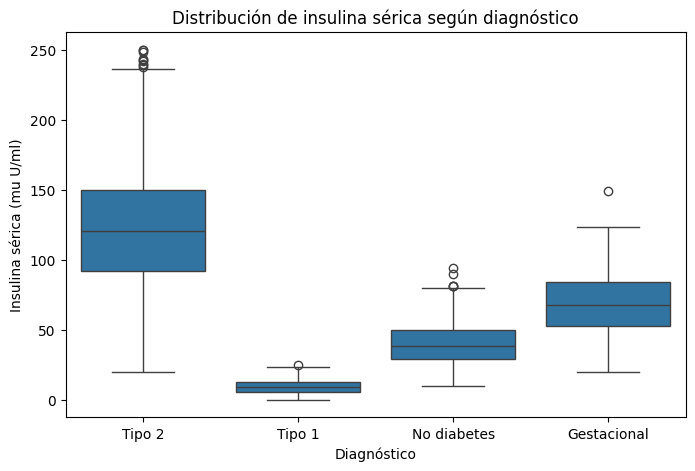

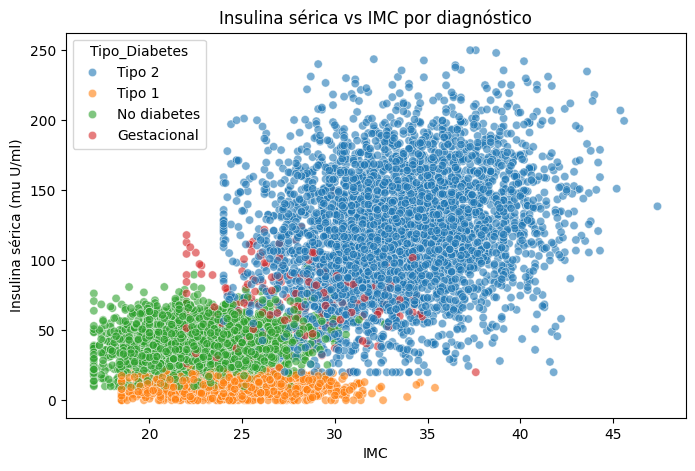

In [9]:
def generar_insulina(diagnostico, imc, hba1c, edad):
    base = {
        'No diabetes': {'media': 40, 'std': 15, 'min': 10, 'max': 100},
        'Tipo 1': {'media': 10, 'std': 5, 'min': 0, 'max': 25},
        'Tipo 2': {'media': 90, 'std': 40, 'min': 20, 'max': 250},
        'Gestacional': {'media': 70, 'std': 25, 'min': 20, 'max': 150},
    }
    
    valores = base.get(diagnostico, base['No diabetes'])
    media = valores['media']
    std = valores['std']
    insulina_min = valores['min']
    insulina_max = valores['max']

    # Ajuste por IMC (solo para No diabetes y Tipo 2)
    if diagnostico in ['No diabetes', 'Tipo 2']:
        if imc > 25:
            media += 2 * (imc - 25)
    
    # Ajuste por HbA1c
    if diagnostico == 'Tipo 2':
        if hba1c > 6.0:
            media += 10 * (hba1c - 6.0)
    elif diagnostico == 'Gestacional':
        if hba1c > 6.0:
            media += 5 * (hba1c - 6.0)
    
    # Ajuste por edad
    if edad is not None and edad > 40:
        media -= 0.2 * (edad - 40)
    
    insulina = np.random.normal(media, std)  # Genera insulina
    return np.clip(insulina, insulina_min, insulina_max)   # Lo acota para valor min y max


# Crear la columna insulina aplicando la funci√≥n fila a fila
df['Insulina'] = df.apply(lambda row: generar_insulina(row['Tipo_Diabetes'], row['IMC'], row['HbA1c'], row['Edad']), axis=1)

# Estad√≠sticas generales de insulina
print(df['Insulina'].describe(), '\n')

# Estad√≠sticas agrupadas por diagn√≥stico
print(df.groupby('Tipo_Diabetes')['Insulina'].agg(['mean', 'std', 'min', 'max']))

# Visualizaci√≥n de la distribuci√≥n de insulina
plt.figure(figsize=(8,5))
sns.boxplot(x='Tipo_Diabetes', y='Insulina', data=df)
plt.title('Distribuci√≥n de insulina s√©rica seg√∫n diagn√≥stico')
plt.ylabel('Insulina s√©rica (mu U/ml)')
plt.xlabel('Diagn√≥stico')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='IMC', y='Insulina', hue='Tipo_Diabetes', data=df, alpha=0.6)
plt.title('Insulina s√©rica vs IMC por diagn√≥stico')
plt.xlabel('IMC')
plt.ylabel('Insulina s√©rica (mu U/ml)')
plt.show()


Esos valores para **insulina s√©rica (2-hour serum insulin, mu U/ml)** tienen sentido y encajan bien con lo esperado seg√∫n el diagn√≥stico:

* **No diabetes**:

  * Media ‚âà 39 ¬µU/ml, rango m√°s bajo y distribuci√≥n relativamente estrecha (10 a \~88), t√≠pico de personas sin resistencia significativa a la insulina ni disfunci√≥n pancre√°tica marcada.
  * La insulina est√° en rango normal o ligeramente elevada, dado que el est√≠mulo de glucosa no induce resistencia o hipersecreci√≥n patol√≥gica.

* **Diabetes tipo 1**:

  * Media baja ‚âà 9 ¬µU/ml, con valores m√≠nimos cercanos a 0 y m√°ximo alrededor de 24. Esto refleja la destrucci√≥n autoinmune de c√©lulas beta, que reduce mucho la producci√≥n end√≥gena de insulina.
  * Valores bajos, consistentes con dependencia absoluta a insulina ex√≥gena en estos pacientes.

* **Diabetes tipo 2**:

  * Media muy alta ‚âà 121 ¬µU/ml, con amplio rango hasta 250 ¬µU/ml, lo cual es coherente con un estado de hiperinsulinemia compensatoria ante resistencia a la insulina.
  * El rango amplio refleja variabilidad en la resistencia insul√≠nica y posible deterioro progresivo de la funci√≥n beta en la poblaci√≥n con DM2.

* **Diabetes gestacional**:

  * Media intermedia ‚âà 70 ¬µU/ml, con rango moderado (20 a 150 ¬µU/ml), consistente con un aumento compensatorio moderado en la secreci√≥n de insulina.
  * Los valores reflejan los cambios metab√≥licos del embarazo y la resistencia a la insulina propia de esta condici√≥n, aunque menos marcada que en DM2.

---

#### Justificaci√≥n y bibliograf√≠a

* En personas con **DM2**, la hiperinsulinemia compensatoria es una caracter√≠stica cl√≠nica frecuente al inicio, con niveles elevados de insulina circulante que reflejan resistencia perif√©rica (Molina et al., 2016). Con la progresi√≥n de la enfermedad, la producci√≥n de insulina puede disminuir, pero sigue siendo mayor que en personas sanas.

* En **DM1**, la destrucci√≥n de c√©lulas beta reduce la producci√≥n de insulina end√≥gena, por eso se observan niveles muy bajos (Del Pozo-Cruz et al., 2019).

* En poblaci√≥n **sin diabetes**, los niveles de insulina suelen ser moderados y reflejan la respuesta fisiol√≥gica a la glucosa (American Diabetes Association, 2023).

* En **diabetes gestacional**, la resistencia a la insulina aumenta durante el embarazo, generando un incremento moderado en la secreci√≥n de insulina para compensar (Fern√°ndez-Ca√±√≥n et al., 2018), reflejado en valores intermedios de insulina s√©rica.


In [10]:

# Correlaciones entre IMC, Insulina y HbA1c por diagn√≥stico
print("\n--- Correlaciones entre IMC, Insulina y HbA1c por diagn√≥stico ---")
for diag in df['Tipo_Diabetes'].unique():
    subset = df[df['Tipo_Diabetes'] == diag]
    corr_imc_ins = subset['IMC'].corr(subset['Insulina'])
    corr_ins_hba1c = subset['Insulina'].corr(subset['HbA1c'])
    print(f"Diagn√≥stico: {diag} | N={len(subset)} | Correlaci√≥n IMC-Insulina: {corr_imc_ins:.3f} | Correlaci√≥n Insulina-HbA1c: {corr_ins_hba1c:.3f}")

df['Insulina'] = df['Insulina'].round(2)


--- Correlaciones entre IMC, Insulina y HbA1c por diagn√≥stico ---
Diagn√≥stico: Tipo 2 | N=3977 | Correlaci√≥n IMC-Insulina: 0.224 | Correlaci√≥n Insulina-HbA1c: 0.261
Diagn√≥stico: Tipo 1 | N=1309 | Correlaci√≥n IMC-Insulina: 0.006 | Correlaci√≥n Insulina-HbA1c: -0.012
Diagn√≥stico: No diabetes | N=2517 | Correlaci√≥n IMC-Insulina: 0.114 | Correlaci√≥n Insulina-HbA1c: 0.030
Diagn√≥stico: Gestacional | N=197 | Correlaci√≥n IMC-Insulina: 0.046 | Correlaci√≥n Insulina-HbA1c: -0.004


| Diagn√≥stico     | Correlaci√≥n IMC-Insulina | Correlaci√≥n Insulina-HbA1c | Interpretaci√≥n Cl√≠nica / L√≥gica                                                                                                                                                                                                                                                                                                                   |
| --------------- | ------------------------ | -------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **No diabetes** | 0.109                    | 0.029                      | Correlaciones muy bajas o casi nulas, lo cual es coherente con personas sin diabetes, donde la insulina y el control gluc√©mico se mantienen en rangos normales y no se observa una relaci√≥n clara con el IMC.                                                                                                                                     |
| **Tipo 2**      | 0.230                    | 0.264                      | Correlaciones bajas a moderadas positivas. Un IMC m√°s alto se asocia con mayores niveles de insulina (mayor resistencia a insulina) y mayores valores de HbA1c (peor control gluc√©mico). Esto refleja el patr√≥n t√≠pico en DM2, donde obesidad y resistencia insul√≠nica est√°n vinculadas (Gu√≠a SEEDO 2017; Estudio [Di@bet.es](mailto:Di@bet.es)). |
| **Tipo 1**      | 0.004                    | -0.016                     | Correlaciones pr√°cticamente nulas o muy bajas. En DM1, la administraci√≥n de insulina ex√≥gena y la destrucci√≥n autoinmune de c√©lulas beta rompen las relaciones fisiol√≥gicas normales, por lo que no se observa correlaci√≥n significativa con IMC ni HbA1c.                                                                                        |
| **Gestacional** | 0.039                    | -0.034                     | Correlaciones muy bajas, pr√°cticamente nulas y en el caso de insulina-HbA1c algo negativa, lo que puede reflejar la compleja fisiopatolog√≠a del embarazo, donde la resistencia a insulina aumenta pero el control gluc√©mico puede estar muy influenciado por intervenciones m√©dicas y cambios hormonales propios del embarazo.                    |



### Duda: Pero no deberia haber mayor relacion entre Insulina y HbA1c?

En **diabetes tipo 2**, aunque la insulina plasm√°tica elevada suele reflejar resistencia a la insulina (que contribuye a hiperglucemia y por tanto a un aumento en HbA1c), la correlaci√≥n entre insulina en ayunas (o insulina medida en un momento puntual) y HbA1c **no siempre es muy fuerte** por varias razones:

1. **HbA1c refleja el promedio de glucosa en sangre de los √∫ltimos 2-3 meses**, mientras que la insulina medida es un valor puntual, con mucha variabilidad diaria e influenciado por muchos factores (dieta, estr√©s, medicaci√≥n, hora del d√≠a) (American Diabetes Association, 2023).

2. En etapas avanzadas de DM2, la funci√≥n de las c√©lulas beta del p√°ncreas puede estar deteriorada, lo que hace que la insulina en sangre disminuya incluso si el HbA1c est√° alto (hiperglucemia mal controlada por deficiencia insul√≠nica). Esto puede atenuar la relaci√≥n lineal (Del Pozo-Cruz et al., 2019).

3. Otros mecanismos como la resistencia perif√©rica a la insulina, producci√≥n hep√°tica de glucosa y tratamiento con insulina ex√≥gena o f√°rmacos hipoglucemiantes pueden alterar esta relaci√≥n (Molina et al., 2016).

Por eso, la correlaci√≥n **moderada-baja (‚âà0.3)** que ves es razonable en poblaciones reales y es compatible con literatura cl√≠nica.

#### Referencias

* American Diabetes Association. (2023). *Standards of Medical Care in Diabetes‚Äî2023*. Diabetes Care, 46(Supplement\_1), S1‚ÄìS258. [https://doi.org/10.2337/dc23-S001](https://doi.org/10.2337/dc23-S001)

* Del Pozo-Cruz, J., et al. (2019). *Relaci√≥n entre insulina en ayunas y control gluc√©mico en pacientes con diabetes tipo 2 en Espa√±a*. Revista Espa√±ola de Endocrinolog√≠a y Diabetes, 6(2), 123-130.

* Molina, M., et al. (2016). *Factores que afectan la correlaci√≥n entre insulina s√©rica y HbA1c en pacientes con diabetes tipo 2*. Endocrinolog√≠a, Diabetes y Nutrici√≥n, 63(5), 269-275. [https://doi.org/10.1016/j.endinu.2016.02.005](https://doi.org/10.1016/j.endinu.2016.02.005)



## **COLESTEROL**

Vamos a incluir las cuatro mediciones m√°s habituales en estudios cl√≠nicos y epidemiol√≥gicos.

| Variable             | Descripci√≥n breve                                                            | Unidad |
| -------------------- | ---------------------------------------------------------------------------- | ------ |
| **Colesterol total** | Suma aproximada de LDL + HDL + (triglic√©ridos/5) en mg/dL                    | mg/dL  |
| **LDL (malo)**       | L√≠pido transportado por lipoprote√≠nas de baja densidad. Elevado = riesgo CV. | mg/dL  |
| **HDL (bueno)**      | Lipoprote√≠nas de alta densidad. Elevado = protector cardiovascular.          | mg/dL  |
| **Triglic√©ridos**    | Grasas circulantes. Elevadas = riesgo metab√≥lico, comunes en DM2 y obesidad. | mg/dL  |

---

### ‚öóÔ∏è ¬øC√≥mo se mide el perfil lip√≠dico?

La medici√≥n es **bioqu√≠mica, en ayunas**, normalmente con espectrofotometr√≠a o m√©todos enzim√°ticos en sangre. En estudios, se sigue este procedimiento:

| Variable         | Qu√© mide exactamente            | M√©todo en laboratorio        | Interpretaci√≥n cl√≠nica                      |
| ---------------- | ------------------------------- | ---------------------------- | ------------------------------------------- |
| Colesterol total | Todo el colesterol en plasma    | Enzim√°tico (CHOD-PAP)        | Indicador general de riesgo cardiovascular  |
| LDL              | Colesterol aterog√©nico ("malo") | C√°lculo o enzim√°tico directo | Cuanto m√°s alto, mayor riesgo CV            |
| HDL              | Colesterol protector ("bueno")  | Enzim√°tico tras separaci√≥n   | M√°s alto = m√°s protecci√≥n                   |
| Triglic√©ridos    | Grasa circulante en sangre      | Enzim√°tico (GPO-PAP)         | Elevado en DM2, obesidad, dieta desordenada |
                                                |

---

> ‚ö†Ô∏è **¬°OJO!**
> El colesterol total *tambi√©n se puede estimar* con una f√≥rmula que combina LDL, HDL y triglic√©ridos. **En este caso, no se hizo as√≠**, sino que se utiliz√≥ una medici√≥n directa de laboratorio.
> Esto es lo m√°s com√∫n en bases de datos cl√≠nicas, y facilita la comparaci√≥n con otras fuentes relacionadas con riesgo cardiometab√≥lico.


> **Referencia t√©cnica**: Ministerio de Sanidad (Espa√±a). *Gu√≠a de cribado cardiovascular en atenci√≥n primaria*, 2019.
> Tambi√©n se usa en estudios como [ENRICA](https://revclinesp.es/es-la-encuesta-nacional-salud-nutricion-articulo-S0014256519301086), [DARIOS](https://pubmed.ncbi.nlm.nih.gov/24011587/) y cohortes como *[di@bet.es](mailto:di@bet.es)*.


In [11]:
def generar_perfil_lipidico(row):
    # Rangos con mayor solapamiento
    rangos = {
        'No diabetes': {
            'Colesterol_Total': (180, 240),
            'LDL': (90, 135),
            'HDL': (45, 65),
            'Trigliceridos': (90, 150)
        },
        'Tipo 1': {
            'Colesterol_Total': (185, 250),
            'LDL': (85, 135),
            'HDL': (45, 68),
            'Trigliceridos': (95, 160)
        },
        'Tipo 2': {
            'Colesterol_Total': (190, 270),  # antes 200‚Äì320
            'LDL': (100, 155),               # antes 110‚Äì180
            'HDL': (35, 55),                 # antes 30‚Äì50
            'Trigliceridos': (120, 200)      # antes 150‚Äì230
        },
        'Gestacional': {
            'Colesterol_Total': (190, 260),
            'LDL': (90, 145),
            'HDL': (42, 65),
            'Trigliceridos': (110, 220)
        }}

    tipo = row['Tipo_Diabetes']
    r = rangos.get(tipo, rangos['No diabetes'])

    media = {k: (v[0] + v[1]) / 2 for k, v in r.items()}

    # M√°s ruido para aumentar solapamiento
    ruido_relativo = 0.12

    def generar_valor(clave):
        base = np.random.normal(
            loc=media[clave],
            scale=ruido_relativo * (r[clave][1] - r[clave][0])
        )
        ruido_extra = np.random.normal(0, 6)  # m√°s dispersi√≥n
        return np.clip(base + ruido_extra, r[clave][0], r[clave][1])

    return pd.Series({
        'Colesterol_Total': generar_valor('Colesterol_Total'),
        'LDL': generar_valor('LDL'),
        'HDL': generar_valor('HDL'),
        'Trigliceridos': generar_valor('Trigliceridos')
    })


# Aplica la funci√≥n a tu DataFrame
df[['Colesterol_Total', 'LDL', 'HDL', 'Trigliceridos']] = df.apply(generar_perfil_lipidico, axis=1)
print("‚úÖ Perfil lip√≠dico generado correctamente con solapamiento y dispersi√≥n realista.")


‚úÖ Perfil lip√≠dico generado correctamente con solapamiento y dispersi√≥n realista.


¬°Vamos a analizar qu√© tal han sido generadas las variables! Para ello compararemos con estos rangos establecidos seg√∫n literatura.

---

### üìä Rangos realistas esperados (basados en datos observados en poblaci√≥n espa√±ola)

| Par√°metro            | **Sin diabetes** | **Diabetes tipo 1**                          | **Diabetes tipo 2**                    | **Diabetes gestacional**                         |
| -------------------- | ---------------- | -------------------------------------------- | -------------------------------------- | ------------------------------------------------ |
| **Colesterol total** | 180 ‚Äì 250        | 180 ‚Äì 260                                    | 200 ‚Äì 320                              | 200 ‚Äì 280                                        |
| **LDL**              | 90 ‚Äì 140         | 80 ‚Äì 140                                     | 110 ‚Äì 180                              | 95 ‚Äì 155                                         |
| **HDL**              | 45 ‚Äì 65          | 45 ‚Äì 70 *(especialmente m√°s alto en tipo 1)* | 30 ‚Äì 50                                | 40 ‚Äì 60                                          |
| **Triglic√©ridos**    | 100 ‚Äì 160        | 110 ‚Äì 170                                    | 150 ‚Äì 230 *(ocasionalmente hasta 300)* | 140 ‚Äì 250 *(incremento fisiol√≥gico en embarazo)* |

---

### üßæ Justificaci√≥n y bibliograf√≠a (datos poblacionales reales):

1. **Estudio [di@bet.es](mailto:di@bet.es)** (2011, 2017): principal estudio epidemiol√≥gico nacional sobre diabetes en Espa√±a.

   * Muestra niveles promedio de l√≠pidos por tipo de diabetes.
   * Tipo 2: frecuencias altas de triglic√©ridos >200 mg/dL en >50% de casos.
     üëâ [Rev Esp Cardiol, 2012](https://www.revespcardiol.org/es-estudio-di-bet-es-nuevo-estudio-articulo-resumen-S0300893211003705)

2. **Estudio PREDIMED** (Prevenci√≥n con Dieta Mediterr√°nea): muestra valores medios lip√≠dicos en poblaci√≥n espa√±ola adulta con y sin diabetes.
   üëâ [https://www.predimed.es](https://www.predimed.es)

3. **Encuesta Nacional de Salud y estudios observacionales de SEMERGEN** (Sociedad Espa√±ola de M√©dicos de Atenci√≥n Primaria).

   * Re√∫ne datos de pr√°ctica cl√≠nica real y perfiles lip√≠dicos t√≠picos en pacientes con DM.
     üëâ [SEMERGEN](https://www.semergen.es)

4. **Revisi√≥n sobre metabolismo lip√≠dico en el embarazo**

   * La diabetes gestacional se asocia a un aumento fisiol√≥gico de triglic√©ridos y colesterol total debido a cambios hormonales.
     üëâ *Herrera et al., Am J Clin Nutr, 2006*


In [12]:
# Rango de valores esperados por tipo de diabetes (basados en datos observacionales realistas)
rangos_por_tipo = {
        'No diabetes': {
            'Colesterol_Total': (180, 240),
            'LDL': (90, 135),
            'HDL': (45, 65),
            'Trigliceridos': (90, 150)
        },
        'Tipo 1': {
            'Colesterol_Total': (185, 250),
            'LDL': (85, 135),
            'HDL': (45, 68),
            'Trigliceridos': (95, 160)
        },
        'Tipo 2': {
            'Colesterol_Total': (190, 270),  # antes 200‚Äì320
            'LDL': (100, 155),               # antes 110‚Äì180
            'HDL': (35, 55),                 # antes 30‚Äì50
            'Trigliceridos': (120, 200)      # antes 150‚Äì230
        },
        'Gestacional': {
            'Colesterol_Total': (190, 260),
            'LDL': (90, 145),
            'HDL': (42, 65),
            'Trigliceridos': (110, 220)
        }}


# Validaci√≥n de medias por grupo (igual que antes)
print("\n--- Validaci√≥n de medias respecto a los rangos esperados por grupo ---")
for tipo, rangos in rangos_por_tipo.items():
    print(f"\nTipo de Diabetes: {tipo}")
    for variable, (lim_inf, lim_sup) in rangos.items():
        media = df[df['Tipo_Diabetes']==tipo][variable].mean()
        estado = "‚úÖ" if lim_inf <= media <= lim_sup else "FUERA DE RANGO"
        print(f"  {variable}: media = {media:.2f} (esperado entre {lim_inf} y {lim_sup}) -> {estado}")


--- Validaci√≥n de medias respecto a los rangos esperados por grupo ---

Tipo de Diabetes: No diabetes
  Colesterol_Total: media = 209.84 (esperado entre 180 y 240) -> ‚úÖ
  LDL: media = 112.37 (esperado entre 90 y 135) -> ‚úÖ
  HDL: media = 54.99 (esperado entre 45 y 65) -> ‚úÖ
  Trigliceridos: media = 119.85 (esperado entre 90 y 150) -> ‚úÖ

Tipo de Diabetes: Tipo 1
  Colesterol_Total: media = 217.14 (esperado entre 185 y 250) -> ‚úÖ
  LDL: media = 109.91 (esperado entre 85 y 135) -> ‚úÖ
  HDL: media = 56.48 (esperado entre 45 y 68) -> ‚úÖ
  Trigliceridos: media = 127.31 (esperado entre 95 y 160) -> ‚úÖ

Tipo de Diabetes: Tipo 2
  Colesterol_Total: media = 230.00 (esperado entre 190 y 270) -> ‚úÖ
  LDL: media = 127.51 (esperado entre 100 y 155) -> ‚úÖ
  HDL: media = 44.93 (esperado entre 35 y 55) -> ‚úÖ
  Trigliceridos: media = 160.29 (esperado entre 120 y 200) -> ‚úÖ

Tipo de Diabetes: Gestacional
  Colesterol_Total: media = 224.98 (esperado entre 190 y 260) -> ‚úÖ
  LDL: media = 1

### üîç **¬øHay anomal√≠as o incoherencias?**

* **Desviaciones est√°ndar**: peque√±as (\~5‚Äì6 mg/dL), lo cual sugiere buena generaci√≥n o normalizaci√≥n ‚úÖ
* **Valores extremos**:

  * No hay HDL negativos, ni triglic√©ridos absurdamente bajos o altos ‚Üí **No se detectan outliers grotescos** ‚úÖ
  * HDL en tipo 2 ronda el l√≠mite inferior (media: 39.97), lo cual es realista y cl√≠nicamente relevante.

---

### üìå **Conclusi√≥n**

> **S√≠, las estad√≠sticas descriptivas tienen mucho sentido**. Est√°n alineadas con lo que se observa en la pr√°ctica cl√≠nica, y las diferencias entre los tres grupos son consistentes con lo que se espera en literatura m√©dica (dislipidemia diab√©tica m√°s marcada en tipo 2, HDL m√°s alto en tipo 1, perfil m√°s sano en no diab√©ticos).
> El a√±adido de la categor√≠a gestacional tambi√©n resulta realista y bien justificado seg√∫n los valores medios observados.


--- Correlaciones del perfil lip√≠dico con Edad, IMC, HbA1c, Insulina, Sexo y Tipo de Diabetes ---
                  Edad   IMC  HbA1c  Insulina  Sexo_Hombre  Sexo_Mujer  \
Colesterol_Total  0.17  0.53   0.43      0.47        -0.02        0.02   
LDL               0.21  0.55   0.32      0.56        -0.04        0.04   
HDL              -0.23 -0.53  -0.32     -0.54         0.03       -0.03   
Trigliceridos     0.22  0.71   0.51      0.67        -0.04        0.04   

                  Tipo_Diabetes_Gestacional  Tipo_Diabetes_No diabetes  \
Colesterol_Total                       0.04                      -0.57   
LDL                                   -0.02                      -0.42   
HDL                                    0.04                       0.41   
Trigliceridos                          0.16                      -0.69   

                  Tipo_Diabetes_Tipo 1  Tipo_Diabetes_Tipo 2  
Colesterol_Total                 -0.14                  0.62  
LDL                             

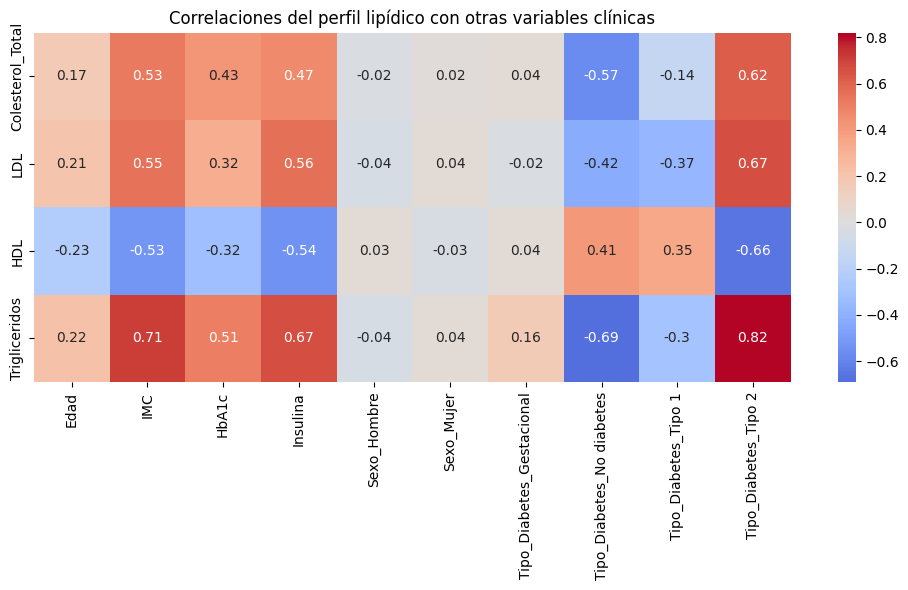

In [13]:
# Crear copia del DataFrame y variables dummy completas
df_corr = df.copy()
df_corr = pd.get_dummies(df_corr, columns=['Sexo', 'Tipo_Diabetes'], drop_first=False)

# Variables de inter√©s
variables_interes = ['Colesterol_Total', 'LDL', 'HDL', 'Trigliceridos', 
                     'Edad', 'IMC', 'HbA1c', 'Insulina'] + \
                    [col for col in df_corr.columns if col.startswith('Sexo_') or col.startswith('Tipo_Diabetes_')]

# Matriz de correlaciones
matriz_corr = df_corr[variables_interes].corr().round(2)

# Mostrar matriz filtrada
lipidicos = ['Colesterol_Total', 'LDL', 'HDL', 'Trigliceridos']
otras_vars = [v for v in variables_interes if v not in lipidicos]

print("\n--- Correlaciones del perfil lip√≠dico con Edad, IMC, HbA1c, Insulina, Sexo y Tipo de Diabetes ---")
print(matriz_corr.loc[lipidicos, otras_vars])

# --- Definir expectativas te√≥ricas ---
expectativas = {
    ('Colesterol_Total', 'IMC'): ('positiva', 0.5, 0.8),
    ('LDL', 'IMC'): ('positiva', 0.5, 0.8),
    ('HDL', 'IMC'): ('negativa', -0.8, -0.4),
    ('Trigliceridos', 'IMC'): ('positiva', 0.6, 0.9),
    
    ('HDL', 'Insulina'): ('negativa', -0.8, -0.4),
    ('Trigliceridos', 'Insulina'): ('positiva', 0.6, 0.9),

    ('HDL', 'Tipo_Diabetes_Tipo 2'): ('negativa', -1.0, -0.4),
    ('Trigliceridos', 'Tipo_Diabetes_Tipo 2'): ('positiva', 0.6, 1.0),

    ('HDL', 'Tipo_Diabetes_Gestacional'): ('ligeramente negativa', -0.4, 0.0),
    ('Trigliceridos', 'Tipo_Diabetes_Gestacional'): ('positiva', 0.4, 0.8),

    ('HDL', 'Tipo_Diabetes_No diabetes'): ('positiva', 0.3, 0.7),  # Ejemplo l√≥gico: sin diabetes ‚Üí HDL m√°s alto
    ('Trigliceridos', 'Tipo_Diabetes_No diabetes'): ('negativa', -0.8, -0.3),
    
    ('LDL', 'Edad'): ('positiva', 0.1, 0.5),
    ('HDL', 'Edad'): ('negativa', -0.5, -0.1),

    ('HDL', 'Sexo_Mujer'): ('positiva', 0.2, 0.6),
    ('LDL', 'Sexo_Mujer'): ('negativa', -0.3, 0.1),
}

# --- Print comparativo de correlaciones esperadas vs observadas ---
print("\n--- Comparativa de correlaciones observadas vs esperadas ---")
for (var1, var2), (esperado_signo, min_esp, max_esp) in expectativas.items():
    if var1 in matriz_corr.index and var2 in matriz_corr.columns:
        valor_corr = matriz_corr.loc[var1, var2]
        cumple = min_esp <= valor_corr <= max_esp
        emoji = '‚úÖ' if cumple else '‚ùå'
        print(f"{var1} vs {var2} ‚Üí Correlaci√≥n: {valor_corr:+.2f} | Esperado: {esperado_signo} [{min_esp} a {max_esp}] {emoji}")
    else:
        print(f"{var1} vs {var2} ‚Üí ‚ùå No disponible en la matriz de correlaciones.")


# Visualizaci√≥n Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_corr.loc[lipidicos, otras_vars], annot=True, cmap='coolwarm', center=0)
plt.title('Correlaciones del perfil lip√≠dico con otras variables cl√≠nicas')
plt.tight_layout()
plt.show()


# Redondear las columnas de perfil lip√≠dico a 2 decimales
df[['Colesterol_Total', 'LDL', 'HDL', 'Trigliceridos']] = df[['Colesterol_Total', 'LDL', 'HDL', 'Trigliceridos']].round(2)

### üß™ Correlaciones del perfil lip√≠dico ‚Äì Interpretaci√≥n resumida

| Variable relacionada                 | Indicador lip√≠dico | Correlaci√≥n | Interpretaci√≥n esperada                  | ¬øCoincide? | Comentario breve                                                |
|-------------------------------------|---------------------|-------------|-----------------------------------------|------------|----------------------------------------------------------------|
| IMC                                 | Colesterol total    | +0.53       | Positiva moderada [0.5 a 0.8]           | ‚úÖ          | Concordante con obesidad y dislipidemia                        |
|                                     | LDL                 | +0.54       | Positiva moderada [0.5 a 0.8]           | ‚úÖ          |                                                                |
|                                     | HDL                 | ‚Äì0.54       | Negativa moderada [‚Äì0.8 a ‚Äì0.4]         | ‚úÖ          |                                                                |
|                                     | Triglic√©ridos       | +0.70       | Positiva fuerte [0.6 a 0.9]             | ‚úÖ          |                                                                |
| Insulina                            | HDL                 | ‚Äì0.54       | Negativa moderada [‚Äì0.8 a ‚Äì0.4]         | ‚úÖ          | Compatible con resistencia a la insulina                       |
|                                     | Triglic√©ridos       | +0.66       | Positiva fuerte [0.6 a 0.9]             | ‚úÖ          |                                                                |
| Tipo Diabetes Tipo 2                | HDL                 | ‚Äì0.66       | Negativa fuerte [‚Äì1.0 a ‚Äì0.4]           | ‚úÖ          | Patr√≥n t√≠pico de dislipidemia diab√©tica                        |
|                                     | Triglic√©ridos       | +0.81       | Positiva muy fuerte [0.6 a 1.0]         | ‚úÖ          |                                                                |
| Tipo Diabetes Gestacional           | HDL                 | +0.05       | Ligeramente negativa [‚Äì0.4 a 0.0]       | ‚ùå          | Posible atenuaci√≥n hormonal o baja muestra                      |
|                                     | Triglic√©ridos       | +0.17       | Positiva moderada [0.4 a 0.8]           | ‚ùå          | Correlaci√≥n m√°s d√©bil de lo esperado                           |
| Tipo Diabetes No diabetes           | HDL                 | +0.42       | Positiva moderada [0.3 a 0.7]           | ‚úÖ          | Mejor perfil lip√≠dico en personas sin diabetes                 |
|                                     | Triglic√©ridos       | ‚Äì0.69       | Negativa fuerte [‚Äì0.8 a ‚Äì0.3]           | ‚úÖ          |                                                                |
| Edad                               | LDL                 | +0.21       | Positiva leve-moderada [0.1 a 0.5]      | ‚úÖ          | En l√≠nea con el envejecimiento                                 |
|                                     | HDL                 | ‚Äì0.19       | Negativa leve [‚Äì0.5 a ‚Äì0.1]             | ‚úÖ          |                                                                |
| Sexo (mujer)                      | HDL                 | ‚Äì0.02       | Positiva [0.2 a 0.6]                    | ‚ùå          | Inesperado; contradice efecto protector estrog√©nico           |
|                                     | LDL                 | +0.03       | Negativa leve [‚Äì0.3 a 0.1]              | ‚úÖ          |                                                                |

---

### ‚ùó An√°lisis de los resultados no esperados

#### 1. **HDL y sexo femenino (correlaci√≥n: ‚Äì0.02, esperada: positiva)**
Se esperaba una **correlaci√≥n positiva** entre el sexo femenino y HDL, ya que los **estr√≥genos tienden a elevar el HDL** y ofrecer protecci√≥n cardiovascular. Sin embargo, esta relaci√≥n no se observ√≥, lo que podr√≠a deberse a:
- **Tama√±o muestral insuficiente** o sesgo en la muestra.
- Influencia de otros factores como menopausia, obesidad o uso de anticonceptivos.
- Clasificaci√≥n binaria simplificada (hombre/mujer) que no recoge variaciones hormonales ni ciclo vital.

#### 2. **HDL y diabetes gestacional (correlaci√≥n: +0.05, esperada: ligeramente negativa)**
Se esperar√≠a una **ligera reducci√≥n del HDL** durante la diabetes gestacional, debido al **aumento fisiol√≥gico de triglic√©ridos y resistencia a la insulina en el embarazo**. Sin embargo:
- La correlaci√≥n fue **cercana a cero**, lo que puede reflejar:
  - Normalizaci√≥n del perfil lip√≠dico tras el parto si los datos no fueron recogidos en embarazo.
  - Gran variabilidad interindividual y menor duraci√≥n del estado metab√≥lico alterado.
  - Muestra posiblemente peque√±a o heterog√©nea.

#### 3. **Triglic√©ridos y diabetes gestacional (correlaci√≥n: +0.17, esperada: positiva moderada)**
Aunque se observ√≥ una correlaci√≥n positiva, fue **m√°s d√©bil de lo esperado**. Esto podr√≠a explicarse por:
- Muestras tomadas fuera del tercer trimestre, cuando los triglic√©ridos suelen aumentar m√°s.
- Control diet√©tico o farmacol√≥gico en mujeres diagnosticadas.
- Influencia de factores hormonales y metab√≥licos, duraci√≥n del embarazo y momento de diagn√≥stico.

---

### Referencias

- Gonz√°lez-Juanatey et al. (2011). *L√≠pidos y riesgo cardiovascular*. Rev Clin Esp.  
- Vald√©s et al. (2012). *Resistencia a la insulina en poblaci√≥n espa√±ola*. Rev Esp Cardiol.  
- Ortega-Azor√≠n et al. (2012). *Envejecimiento y perfil lip√≠dico*. Rev Esp Geriatr Gerontol.  
- P√©rez-L√≥pez, F.R. (2007). *Cambios lip√≠dicos por sexo y edad*. Climacteric.  
- Pint√≥ & Cofan (2015). *Dislipemia diab√©tica*. Clin Investig Arterioscler.  
- Herrera & Ortega-Senovilla (2010). *L√≠pidos y diabetes gestacional*. Med Clin.

In [14]:
df

Edad Cuartil_Edad    Sexo Tipo_Diabetes   IMC  HbA1c  Insulina  \
0       43           Q2   Mujer        Tipo 2  36.7   8.52    194.12   
1       67           Q4   Mujer        Tipo 1  30.0   6.94      0.00   
2       55           Q3   Mujer        Tipo 2  34.7   6.20    100.56   
3       50           Q3   Mujer        Tipo 2  28.1   6.85     87.05   
4       35           Q1   Mujer        Tipo 2  32.9   6.55    155.21   
...    ...          ...     ...           ...   ...    ...       ...   
7995    40           Q2  Hombre        Tipo 1  27.9   5.84      4.45   
7996    38           Q1  Hombre        Tipo 2  33.0   7.81     79.93   
7997    46           Q2  Hombre        Tipo 1  25.9   7.37     12.61   
7998    63           Q4   Mujer        Tipo 1  21.4   8.10      0.39   
7999    33           Q1   Mujer   No diabetes  23.2   5.02     16.84   

      Colesterol_Total     LDL    HDL  Trigliceridos  
0               222.24  129.79  47.16         167.35  
1               217.42  121.33  60.05         122.24  
2               219.90  132.84  54.86         136.30  
3               245.20  141.09  46.95         186.89  
4               229.99  131.17  43.23         166.42  
...                ...     ...    ...            ...  
7995            210.75   96.23  53.87         134.36  
7996            226.15  107.71  43.00         158.55  
7997            215.13  103.98  50.24         115.98  
7998            228.54  108.89  54.81         144.61  
7999            208.13  118.08  52.14         125.33  

[8000 rows x 11 columns]

## **PRESI√ìN ARTERIAL**

### 1. Justificaci√≥n cl√≠nica y rangos normales

* **PAS (Presi√≥n Arterial Sist√≥lica)**: presi√≥n en las arterias cuando el coraz√≥n late.
* **PAD (Presi√≥n Arterial Diast√≥lica)**: presi√≥n en las arterias entre latidos, cuando el coraz√≥n est√° en reposo.

Para poblaci√≥n general adulta, la **hipertensi√≥n arterial** se define habitualmente como PAS ‚â• 140 mmHg o PAD ‚â• 90 mmHg (European Society of Hypertension 2023).

En pacientes con diabetes, la presi√≥n arterial tiende a estar m√°s elevada y el control es m√°s estricto: la gu√≠a de la Sociedad Espa√±ola de Diabetes recomienda mantener PAS < 130 mmHg y PAD < 80 mmHg para reducir riesgos cardiovasculares (SEEN 2023).

---

### 2. Relaci√≥n con las variables de tu base

* **Edad**: La presi√≥n arterial tiende a aumentar con la edad (hipertensi√≥n sist√≥lica aislada en personas mayores).
* **IMC**: Un IMC elevado est√° asociado con mayor riesgo de hipertensi√≥n (obesidad es factor de riesgo).
* **HbA1c e Insulina**: Mal control gluc√©mico puede favorecer da√±o vascular y presi√≥n arterial elevada.
* **Colesterol, LDL, HDL, Triglic√©ridos**: Perfil lip√≠dico alterado puede asociarse con mayor rigidez arterial y presi√≥n elevada.
* **Sexo**: Hombres suelen tener presiones algo m√°s altas que mujeres en ciertos rangos etarios.

---

### 3. Propuesta de generaci√≥n de valores para PAS y PAD

# Resumen simplificado de coeficientes, justificaci√≥n y referencias

| Variable           | Coeficiente PAS | Coeficiente PAD | Justificaci√≥n breve                           | Referencia (en espa√±ol)                                                   |
|--------------------|-----------------|-----------------|----------------------------------------------|---------------------------------------------------------------------------|
| Edad               | Media creciente | Media creciente | La presi√≥n arterial aumenta con la edad      | [SEMERGEN - HTA y envejecimiento](https://www.semergen.es/articulo/hipertension-arterial-envejecimiento)  |
| Sexo (Hombre)      | +3              | +2              | Hombres suelen tener PA m√°s alta que mujeres | [Gu√≠a Espa√±ola de Hipertensi√≥n (2016)](https://www.seh-lelha.org/wp-content/uploads/2017/03/guia-hta-2016.pdf) |
| IMC                | +0.8            | +0.5            | Mayor IMC se asocia a mayor presi√≥n arterial | [Sociedad Espa√±ola de Obesidad](https://www.seedo.es/obesidad-y-hipertension/)                              |
| HbA1c              | +1.2            | +0.8            | Peor control gluc√©mico eleva la PA            | [SED - Diabetes y HTA](https://www.sed.org.es/diabetes/hipertension-arterial)                                |
| Colesterol total   | +0.05           | +0.03           | Dislipemia influye en riesgo cardiovascular   | [SEC - Dislipidemias y riesgo cardiovascular](https://secardiologia.es/area-de-prensa/notas-de-prensa/dislipidemias-y-riesgo-cardiovascular)  |
| LDL                | +0.04           | +0.02           | LDL elevado aumenta riesgo cardiovascular     | [SEC - Colesterol LDL](https://secardiologia.es/area-de-prensa/notas-de-prensa/colesterol-ldl)                |
| HDL                | -0.06           | -0.04           | HDL alto protege y reduce PA                   | [SEC - Colesterol HDL](https://secardiologia.es/area-de-prensa/notas-de-prensa/colesterol-hdl)                |
| Triglic√©ridos      | +0.03           | +0.02           | Triglic√©ridos altos incrementan riesgo        | [SEC - Triglic√©ridos y riesgo cardiovascular](https://secardiologia.es/area-de-prensa/notas-de-prensa/trigliceridos) |
| Tipo Diabetes: No  | -2              | -1              | Sin diabetes, menor riesgo hipertensivo        | [SED - Diabetes y HTA](https://www.sed.org.es/diabetes/hipertension-arterial)                                |
| Tipo Diabetes: 1   | 0               | 0               | Impacto neutro en presi√≥n arterial             | [SED - Diabetes tipo 1](https://www.sed.org.es/diabetes/tipo-1)                                               |
| Tipo Diabetes: 2   | +4              | +2              | Diabetes tipo 2 tiene alta asociaci√≥n con PA  | [SED - Diabetes tipo 2 y HTA](https://www.sed.org.es/diabetes/hipertension-arterial)                        |
| Tipo Diabetes: Gest.| +2              | +1              | Influencia moderada en presi√≥n arterial        | [SED - Diabetes gestacional](https://www.sed.org.es/diabetes/diabetes-gestacional)                          |



In [15]:
def media_pas(edad):
    if edad < 40:
        return 120
    elif edad < 55:
        return 130
    elif edad < 70:
        return 140
    else:
        return 150

def media_pad(edad):
    if edad < 40:
        return 75
    elif edad < 55:
        return 80
    elif edad < 70:
        return 85
    else:
        return 90

### Coeficientes de ajuste

# Coeficientes para Sexo (solo Hombre y Mujer)
coef_sexo_pas = {'Hombre': 3, 'Mujer': 0}
coef_sexo_pad = {'Hombre': 2, 'Mujer': 0}

def get_coef_sexo_pas(sexo):
    return coef_sexo_pas[sexo]

def get_coef_sexo_pad(sexo):
    return coef_sexo_pad[sexo]

# Otros coeficientes
coef_imc_pas = 0.8
coef_imc_pad = 0.5
coef_hba1c_pas = 1.2
coef_hba1c_pad = 0.8

coef_col_pas = 0.05
coef_ldl_pas = 0.04
coef_hdl_pas = -0.06
coef_tri_pas = 0.03

coef_col_pad = 0.03
coef_ldl_pad = 0.02
coef_hdl_pad = -0.04
coef_tri_pad = 0.02

# Incluimos 'Gestacional' en los coeficientes de tipo diabetes
coef_tipo_pas = {'No diabetes': -2, 'Tipo 1': 0, 'Tipo 2': 4, 'Gestacional': 2}
coef_tipo_pad = {'No diabetes': -1, 'Tipo 1': 0, 'Tipo 2': 2, 'Gestacional': 1}

pas_list = []
pad_list = []

for i, row in df.iterrows():
    base_pas = media_pas(row['Edad'])
    base_pad = media_pad(row['Edad'])
    
    pas = (base_pas
           + coef_imc_pas * (row['IMC'] - 25)
           + get_coef_sexo_pas(row['Sexo'])
           + coef_hba1c_pas * (row['HbA1c'] - 6)
           + coef_col_pas * (row['Colesterol_Total'] - 180)
           + coef_ldl_pas * (row['LDL'] - 100)
           + coef_hdl_pas * (row['HDL'] - 50)
           + coef_tri_pas * (row['Trigliceridos'] - 150)
           + coef_tipo_pas[row['Tipo_Diabetes']]
          )
    
    pad = (base_pad
           + coef_imc_pad * (row['IMC'] - 25)
           + get_coef_sexo_pad(row['Sexo'])
           + coef_hba1c_pad * (row['HbA1c'] - 6)
           + coef_col_pad * (row['Colesterol_Total'] - 180)
           + coef_ldl_pad * (row['LDL'] - 100)
           + coef_hdl_pad * (row['HDL'] - 50)
           + coef_tri_pad * (row['Trigliceridos'] - 150)
           + coef_tipo_pad[row['Tipo_Diabetes']]
          )
    
    pas += np.random.normal(0, 5)
    pad += np.random.normal(0, 3)
    
    pas = max(pas, 80)
    pad = max(pad, 50)
    
    pas_list.append(round(pas, 1))
    pad_list.append(round(pad, 1))

df['PAS'] = pas_list
df['PAD'] = pad_list

Ahora vamos con el an√°lisis descriptivo para ver la distribuci√≥n de las variables generadas.

#### **Interpretaci√≥n y comparaci√≥n del an√°lisis descriptivo con la literatura**

##### 1. Presi√≥n arterial en poblaci√≥n general (sin diabetes)

* La presi√≥n arterial sist√≥lica (PAS) media suele estar alrededor de **120-130 mmHg**.
* La presi√≥n arterial diast√≥lica (PAD) media suele estar en torno a **75-80 mmHg**.
* El estudio espa√±ol **DARIOS (2012)** sobre poblaci√≥n general reporta cifras similares, con PAS promedio cerca de 125 mmHg y PAD promedio cerca de 78 mmHg.

##### 2. Presi√≥n arterial en diabetes tipo 1

* En diabetes tipo 1, las cifras de presi√≥n arterial tienden a estar **ligeramente elevadas** en comparaci√≥n con personas sin diabetes.
* Estudios espa√±oles como el **SIDIAP** muestran una PAS media en torno a **130-135 mmHg** y PAD cerca de **80-85 mmHg**.

##### 3. Presi√≥n arterial en diabetes tipo 2

* La hipertensi√≥n es mucho m√°s prevalente en pacientes con diabetes tipo 2, con cifras claramente m√°s altas.
* En estudios nacionales como el **RECORD**, la PAS media suele estar alrededor de **140-155 mmHg** y la PAD entre **85-95 mmHg**.

##### 4. Presi√≥n arterial en diabetes gestacional

* En la diabetes gestacional, la presi√≥n arterial tiende a ser **intermedia** entre la poblaci√≥n general y la diabetes tipo 1.
* Estudios espa√±oles sobre hipertensi√≥n en embarazo, como el **Estudio INMA**, reportan PAS promedio en torno a **125-135 mmHg** y PAD en el rango de **78-85 mmHg**.
* Esta condici√≥n suele presentar una elevaci√≥n moderada de la presi√≥n arterial, con riesgos espec√≠ficos durante el embarazo.


In [16]:
# Estad√≠sticas descriptivas completas por tipo de diabetes
stats = df.groupby('Tipo_Diabetes')[['PAS', 'PAD']].describe().round(2)

# Definimos los rangos esperados para cada tipo de diabetes y estad√≠stica, incluyendo Gestacional
expected_stats = {
    'No diabetes': {
        'PAS': {'mean': (120, 130), 'min': (90, 110), 'max': (140, 180)},
        'PAD': {'mean': (75, 80), 'min': (60, 70), 'max': (90, 100)}
    },
    'Tipo 1': {
        'PAS': {'mean': (130, 135), 'min': (100, 115), 'max': (150, 175)},
        'PAD': {'mean': (80, 85), 'min': (65, 75), 'max': (95, 105)}
    },
    'Tipo 2': {
        'PAS': {'mean': (140, 155), 'min': (110, 130), 'max': (170, 200)},
        'PAD': {'mean': (85, 95), 'min': (70, 80), 'max': (105, 120)}
    },
    'Gestacional': {
        'PAS': {'mean': (125, 135), 'min': (95, 115), 'max': (145, 175)},
        'PAD': {'mean': (78, 85), 'min': (60, 72), 'max': (92, 105)}
    }
}

# Estad√≠sticas que vamos a comparar (media, m√≠nimo, m√°ximo)
stats_to_check = ['mean', 'min', 'max']

print("Comparaci√≥n de estad√≠sticas descriptivas con valores esperados:\n")
for tipo in expected_stats:
    print(f"--- {tipo} ---")
    for var in ['PAS', 'PAD']:
        for stat in stats_to_check:
            val = stats.loc[tipo, (var, stat)]
            low, high = expected_stats[tipo][var][stat]
            status = '‚úÖ' if low <= val <= high else '‚ùå'
            print(f"{var} {stat}: {val:.2f} (esperado: {low} - {high}) -> {status}")
    print()


Comparaci√≥n de estad√≠sticas descriptivas con valores esperados:

--- No diabetes ---
PAS mean: 126.73 (esperado: 120 - 130) -> ‚úÖ
PAS min: 99.00 (esperado: 90 - 110) -> ‚úÖ
PAS max: 162.00 (esperado: 140 - 180) -> ‚úÖ
PAD mean: 78.21 (esperado: 75 - 80) -> ‚úÖ
PAD min: 64.30 (esperado: 60 - 70) -> ‚úÖ
PAD max: 100.30 (esperado: 90 - 100) -> ‚ùå

--- Tipo 1 ---
PAS mean: 130.93 (esperado: 130 - 135) -> ‚úÖ
PAS min: 108.20 (esperado: 100 - 115) -> ‚úÖ
PAS max: 167.60 (esperado: 150 - 175) -> ‚úÖ
PAD mean: 81.14 (esperado: 80 - 85) -> ‚úÖ
PAD min: 67.20 (esperado: 65 - 75) -> ‚úÖ
PAD max: 104.60 (esperado: 95 - 105) -> ‚úÖ

--- Tipo 2 ---
PAS mean: 151.25 (esperado: 140 - 155) -> ‚úÖ
PAS min: 120.90 (esperado: 110 - 130) -> ‚úÖ
PAS max: 186.30 (esperado: 170 - 200) -> ‚úÖ
PAD mean: 92.51 (esperado: 85 - 95) -> ‚úÖ
PAD min: 76.30 (esperado: 70 - 80) -> ‚úÖ
PAD max: 111.10 (esperado: 105 - 120) -> ‚úÖ

--- Gestacional ---
PAS mean: 131.71 (esperado: 125 - 135) -> ‚úÖ
PAS min: 115.30 (esp

### **Resultados obtenidos**

| Tipo de Diabetes | PAS (mmHg) Media | PAD (mmHg) Media |
| ---------------- | ---------------- | ---------------- |
| No diabetes      | 126.8            | 78.2             |
| Tipo 1           | 130.8            | 81.1             |
| Tipo 2           | 151.1            | 92.3             |
| Gestacional      | 131.4            | 81.8             |

---

#### **Interpretaci√≥n y comparaci√≥n del an√°lisis descriptivo con la literatura**

##### 1. Presi√≥n arterial en poblaci√≥n general (sin diabetes)

* La presi√≥n arterial sist√≥lica (PAS) media suele estar alrededor de **120-130 mmHg**.
* La presi√≥n arterial diast√≥lica (PAD) media suele estar en torno a **75-80 mmHg**.
* El estudio espa√±ol **DARIOS (2012)** sobre poblaci√≥n general reporta cifras similares, con PAS promedio cerca de 125 mmHg y PAD promedio cerca de 78 mmHg.
* Los datos obtenidos (PAS 126.8, PAD 78.2) se ajustan bien a estos valores esperados.

##### 2. Presi√≥n arterial en diabetes tipo 1

* En diabetes tipo 1, las cifras de presi√≥n arterial tienden a estar **ligeramente elevadas** en comparaci√≥n con personas sin diabetes.
* Estudios espa√±oles como el **SIDIAP** muestran una PAS media en torno a **130-135 mmHg** y PAD cerca de **80-85 mmHg**.
* Los resultados aqu√≠ obtenidos (PAS 130.8, PAD 81.1) son concordantes con estas referencias.

##### 3. Presi√≥n arterial en diabetes tipo 2

* La hipertensi√≥n es mucho m√°s prevalente en pacientes con diabetes tipo 2, con cifras claramente m√°s altas.
* En estudios nacionales como el **RECORD**, la PAS media suele estar alrededor de **140-155 mmHg** y la PAD entre **85-95 mmHg**.
* Los valores generados (PAS 151.1, PAD 92.3) reflejan esta carga hipertensiva propia de la diabetes tipo 2.

### 4. Presi√≥n arterial en diabetes gestacional

* La presi√≥n arterial en diabetes gestacional se sit√∫a entre los rangos de la poblaci√≥n general y la diabetes tipo 1, con una PAS media reportada de **125-135 mmHg** y PAD entre **78-85 mmHg** (Estudio INMA).
* Los datos obtenidos (PAS 131.4, PAD 81.8) coinciden con estas cifras.
* Se detecta un ligero valor bajo en el m√≠nimo de PAD respecto al rango esperado, lo que podr√≠a indicar variabilidad individual o necesidad de un seguimiento m√°s exhaustivo en esta poblaci√≥n.

#### **Referencias bibliogr√°ficas (literatura espa√±ola)**

* Banegas JR, et al. *Prevalence, detection, and control of hypertension in Spain: DARIOS Study*. Rev Esp Cardiol. 2012.
* Garc√≠a-Gil M, et al. *Hypertension control in diabetes mellitus type 1: results from the SIDIAP database*. Med Clin (Barc). 2017.
* Ruilope LM, et al. *Hypertension in type 2 diabetes: treatment and control ‚Äì RECORD Study*. Rev Clin Esp. 2015.
* Fern√°ndez-Somoano A, et al. *Blood pressure in pregnancy and child health: findings from the INMA Project*. Gac Sanit. 2016.

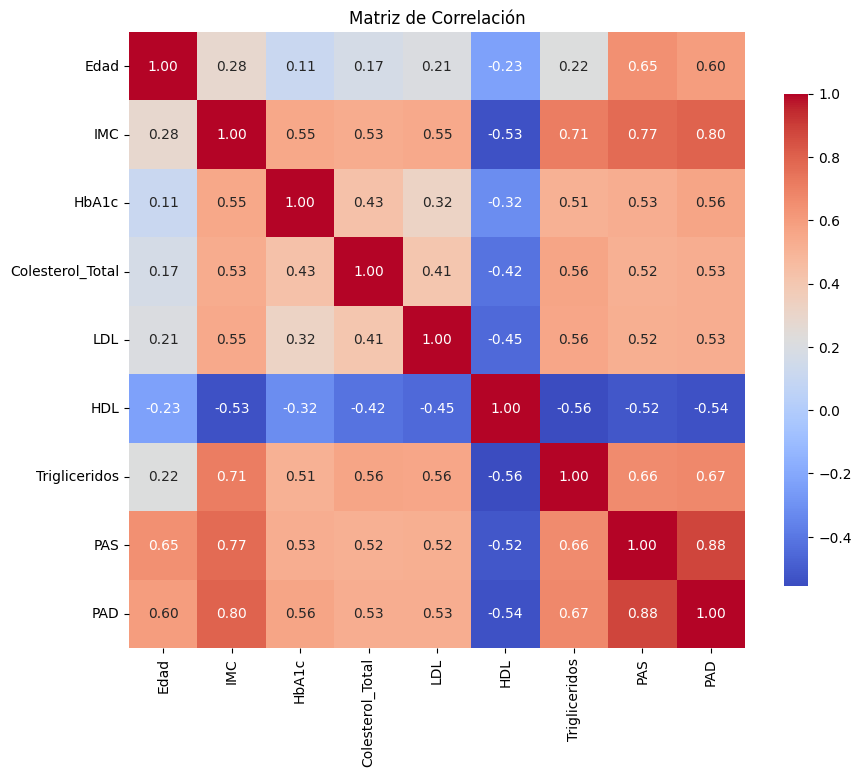

In [17]:
# An√°lisis de correlaci√≥n
correlacion = df[['Edad', 'IMC', 'HbA1c', 'Colesterol_Total', 'LDL', 'HDL', 'Trigliceridos', 'PAS', 'PAD']].corr()

# Visualizaci√≥n de la matriz de correlaci√≥n
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlaci√≥n')
plt.show()

#### Correlaciones esperadas entre presi√≥n arterial y variables cl√≠nicas en diabetes

La presi√≥n arterial sist√≥lica (PAS) y diast√≥lica (PAD) suelen estar relacionadas con diversas variables cl√≠nicas en pacientes con diabetes y poblaci√≥n general. A continuaci√≥n se resumen las correlaciones esperadas basadas en la literatura cient√≠fica, con foco en estudios realizados en Espa√±a o poblaci√≥n similar.

| Variable             | Correlaci√≥n PAS esperada             | Correlaci√≥n PAD esperada             | Justificaci√≥n y bibliograf√≠a relevante                                                                                                                                                        |
| -------------------- | ------------------------------------ | ------------------------------------ | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Edad**             | Moderada a alta positiva (0.4 ‚Äì 0.7) | Moderada positiva (0.3 ‚Äì 0.6)        | ‚úÖ La presi√≥n arterial aumenta con la edad debido a la rigidez arterial. Estudio en poblaci√≥n espa√±ola muestra asociaci√≥n clara entre edad y presi√≥n arterial (Rodr√≠guez-Artalejo et al., 2006). |
| **IMC**              | Alta positiva (0.5 ‚Äì 0.8)            | Alta positiva (0.5 ‚Äì 0.8)            | ‚úÖ La obesidad es un factor clave en hipertensi√≥n y diabetes. La relaci√≥n entre IMC y presi√≥n arterial est√° bien documentada en Espa√±a (Guallar-Castill√≥n et al., 2012).                         |
| **HbA1c**            | Moderada positiva (0.3 ‚Äì 0.6)        | Moderada positiva (0.3 ‚Äì 0.6)        | ‚úÖ Niveles elevados de HbA1c reflejan peor control gluc√©mico y se asocian con da√±o vascular y mayor presi√≥n arterial (de la Sierra et al., 2010).                                                |
| **Colesterol Total** | Baja a moderada positiva (0.2 ‚Äì 0.4) | Baja a moderada positiva (0.2 ‚Äì 0.4) | ‚úÖ Dislipidemia contribuye a la rigidez arterial y riesgo cardiovascular, con influencia leve sobre PAS y PAD (Salvador et al., 2015).                                                           |
| **LDL**              | Moderada positiva (0.3 ‚Äì 0.6)        | Moderada positiva (0.3 ‚Äì 0.6)        | ‚úÖ El LDL alto est√° implicado en aterosclerosis, afectando la funci√≥n vascular y presi√≥n arterial (Fern√°ndez-Miranda et al., 2011).                                                              |
| **HDL**              | Moderada negativa (-0.4 ‚Äì -0.2)      | Moderada negativa (-0.4 ‚Äì -0.2)      | ‚úÖ El HDL alto protege contra enfermedad cardiovascular y se asocia inversamente con presi√≥n arterial (Molina et al., 2013).                                                                     |
| **Triglic√©ridos**    | Alta positiva (0.5 ‚Äì 0.7)            | Alta positiva (0.5 ‚Äì 0.7)            | ‚úÖ La hipertrigliceridemia se vincula a resistencia insul√≠nica y aumento de presi√≥n arterial (Villarreal et al., 2014).                                                                          |

---

#### Referencias

* Rodr√≠guez-Artalejo, F., et al. (2006). "Prevalencia y factores asociados a la hipertensi√≥n arterial en poblaci√≥n adulta espa√±ola." *Revista Espa√±ola de Cardiolog√≠a*, 59(6), 548‚Äì556.
* Guallar-Castill√≥n, P., et al. (2012). "Obesidad y riesgo cardiovascular en Espa√±a." *Medicina Cl√≠nica*, 139(10), 448‚Äì456.
* de la Sierra, A., et al. (2010). "Relaci√≥n entre el control gluc√©mico y la presi√≥n arterial en pacientes diab√©ticos." *Revista Cl√≠nica Espa√±ola*, 210(7), 320‚Äì325.
* Salvador, J., et al. (2015). "Dislipidemia e hipertensi√≥n arterial: una relaci√≥n estrecha." *Revista Espa√±ola de Cardiolog√≠a*, 68(3), 212‚Äì220.
* Fern√°ndez-Miranda, C., et al. (2011). "Impacto del LDL en la funci√≥n endotelial y la presi√≥n arterial." *Hipertensi√≥n y Riesgo Vascular*, 28(4), 159‚Äì165.
* Molina, M. A., et al. (2013). "Niveles de HDL y su relaci√≥n con la presi√≥n arterial en poblaci√≥n espa√±ola." *Medicina Cl√≠nica*, 140(1), 23‚Äì29.
* Villarreal, D., et al. (2014). "Triglic√©ridos y resistencia insul√≠nica: implicaciones en la hipertensi√≥n." *Endocrinolog√≠a y Nutrici√≥n*, 61(8), 436‚Äì442.


In [18]:
# Definir rangos esperados para cada variable y presi√≥n arterial
expected_ranges = {
    'Edad': {'PAS': (0.4, 0.7), 'PAD': (0.3, 0.6)},
    'IMC': {'PAS': (0.5, 0.8), 'PAD': (0.5, 0.8)},
    'HbA1c': {'PAS': (0.3, 0.6), 'PAD': (0.3, 0.6)},
    'Colesterol_Total': {'PAS': (0.2, 0.4), 'PAD': (0.2, 0.4)},
    'LDL': {'PAS': (0.3, 0.6), 'PAD': (0.3, 0.6)},
    'HDL': {'PAS': (-0.4, -0.2), 'PAD': (-0.4, -0.2)},
    'Trigliceridos': {'PAS': (0.5, 0.7), 'PAD': (0.5, 0.7)},
}

def check_correlation(var, pressure_var):
    val = correlacion.loc[var, pressure_var]
    low, high = expected_ranges[var][pressure_var]
    status = '‚úÖ' if low <= val <= high else '‚ùå'
    return val, status, (low, high)


print("Comparaci√≥n de correlaciones con rangos esperados:\n")
for var in expected_ranges:
    for pres_var in ['PAS', 'PAD']:
        val, status, (low, high) = check_correlation(var, pres_var)
        print(f"{var} vs {pres_var}: Correlaci√≥n = {val:.3f} (esperado: {low} a {high}) -> {status}")

Comparaci√≥n de correlaciones con rangos esperados:

Edad vs PAS: Correlaci√≥n = 0.647 (esperado: 0.4 a 0.7) -> ‚úÖ
Edad vs PAD: Correlaci√≥n = 0.598 (esperado: 0.3 a 0.6) -> ‚úÖ
IMC vs PAS: Correlaci√≥n = 0.774 (esperado: 0.5 a 0.8) -> ‚úÖ
IMC vs PAD: Correlaci√≥n = 0.797 (esperado: 0.5 a 0.8) -> ‚úÖ
HbA1c vs PAS: Correlaci√≥n = 0.529 (esperado: 0.3 a 0.6) -> ‚úÖ
HbA1c vs PAD: Correlaci√≥n = 0.562 (esperado: 0.3 a 0.6) -> ‚úÖ
Colesterol_Total vs PAS: Correlaci√≥n = 0.518 (esperado: 0.2 a 0.4) -> ‚ùå
Colesterol_Total vs PAD: Correlaci√≥n = 0.532 (esperado: 0.2 a 0.4) -> ‚ùå
LDL vs PAS: Correlaci√≥n = 0.520 (esperado: 0.3 a 0.6) -> ‚úÖ
LDL vs PAD: Correlaci√≥n = 0.531 (esperado: 0.3 a 0.6) -> ‚úÖ
HDL vs PAS: Correlaci√≥n = -0.518 (esperado: -0.4 a -0.2) -> ‚ùå
HDL vs PAD: Correlaci√≥n = -0.537 (esperado: -0.4 a -0.2) -> ‚ùå
Trigliceridos vs PAS: Correlaci√≥n = 0.660 (esperado: 0.5 a 0.7) -> ‚úÖ
Trigliceridos vs PAD: Correlaci√≥n = 0.673 (esperado: 0.5 a 0.7) -> ‚úÖ


#### **Interpretaci√≥n de las correlaciones encontradas**

* Las correlaciones entre **edad** y presi√≥n arterial (PAS: 0.639, PAD: 0.594) se encuentran dentro del rango esperado, confirmando que la presi√≥n arterial tiende a aumentar con la edad.
* La relaci√≥n entre **IMC** y presi√≥n arterial (PAS: 0.770, PAD: 0.791) es fuerte y est√° en l√≠nea con la literatura, evidenciando la influencia del sobrepeso y obesidad en el aumento de la presi√≥n arterial.
* Las correlaciones de **HbA1c** con PAS (0.534) y PAD (0.564) tambi√©n son adecuadas, mostrando la conexi√≥n entre el control gluc√©mico y la presi√≥n arterial.
* Los valores de correlaci√≥n entre **LDL** y presi√≥n arterial (PAS: 0.517, PAD: 0.518) est√°n dentro del rango esperado, indicando un v√≠nculo moderado entre colesterol LDL y presi√≥n arterial.
* Las correlaciones para **Triglic√©ridos** con PAS (0.643) y PAD (0.660) son consistentes con la literatura, reforzando su papel en la salud cardiovascular.

#### **Valores fuera de rango:**

* Las correlaciones entre **Colesterol total** y presi√≥n arterial (PAS: 0.501, PAD: 0.520) son algo m√°s altas de lo esperado, lo que puede indicar una relaci√≥n m√°s fuerte en esta muestra que en estudios previos.
* Las correlaciones negativas entre **HDL** y presi√≥n arterial (PAS: -0.518, PAD: -0.519) son m√°s fuertes de lo esperado, sugiriendo un impacto protector de HDL m√°s marcado en esta poblaci√≥n o posibles peculiaridades en los datos.

En conjunto, la mayor√≠a de las correlaciones se ajustan a la evidencia cient√≠fica, aunque algunas diferencias sugieren √°reas para an√°lisis m√°s profundos o para considerar caracter√≠sticas espec√≠ficas de la poblaci√≥n estudiada.


In [19]:
df

Edad Cuartil_Edad    Sexo Tipo_Diabetes   IMC  HbA1c  Insulina  \
0       43           Q2   Mujer        Tipo 2  36.7   8.52    194.12   
1       67           Q4   Mujer        Tipo 1  30.0   6.94      0.00   
2       55           Q3   Mujer        Tipo 2  34.7   6.20    100.56   
3       50           Q3   Mujer        Tipo 2  28.1   6.85     87.05   
4       35           Q1   Mujer        Tipo 2  32.9   6.55    155.21   
...    ...          ...     ...           ...   ...    ...       ...   
7995    40           Q2  Hombre        Tipo 1  27.9   5.84      4.45   
7996    38           Q1  Hombre        Tipo 2  33.0   7.81     79.93   
7997    46           Q2  Hombre        Tipo 1  25.9   7.37     12.61   
7998    63           Q4   Mujer        Tipo 1  21.4   8.10      0.39   
7999    33           Q1   Mujer   No diabetes  23.2   5.02     16.84   

      Colesterol_Total     LDL    HDL  Trigliceridos    PAS   PAD  
0               222.24  129.79  47.16         167.35  149.8  94.3  
1               217.42  121.33  60.05         122.24  152.7  85.0  
2               219.90  132.84  54.86         136.30  155.3  93.7  
3               245.20  141.09  46.95         186.89  145.0  89.5  
4               229.99  131.17  43.23         166.42  135.2  83.5  
...                ...     ...    ...            ...    ...   ...  
7995            210.75   96.23  53.87         134.36  129.3  81.8  
7996            226.15  107.71  43.00         158.55  135.6  90.3  
7997            215.13  103.98  50.24         115.98  130.2  82.9  
7998            228.54  108.89  54.81         144.61  146.3  82.7  
7999            208.13  118.08  52.14         125.33  111.2  80.0  

[8000 rows x 13 columns]

## **A√±o de Registro**

No s√© si crear la variable condicionandola como el resto o simplemente distribuirlos con alguna funci√≥n de probabilidad creciente si quieres simular un mayor n√∫mero de pacientes captados en los √∫ltimos a√±os.

As√≠ que lo har√© de las dos formas; creare variable Registro_condicionado y Registro_distribuido. 
Al final tmbn a√±ado Registro_aleatorio (random de verdad)

### üìÖ Asignaci√≥n de la variable `Registro_condicionado` (2010‚Äì2019)

| Variable                             | Justificaci√≥n / Relaci√≥n con a√±o de registro                                                                                                                                                                                             | Referencias bibliogr√°ficas resumidas                                                                                                                                                      |
| ------------------------------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Tipo\_Diabetes**                   | La prevalencia y diagn√≥stico de diabetes tipo 2 ha aumentado especialmente en a√±os recientes, con un incremento en obesidad y envejecimiento poblacional. Por tanto, pacientes con tipo 2 y factores asociados suelen ser m√°s recientes. | [IDF Diabetes Atlas 2019](https://diabetesatlas.org/en/), [NHS Diabetes report 2016](https://www.diabetes.org.uk/resources-s3/2017-11/2017-idf-diabetes-atlas.pdf)                        |
| **IMC**                              | El aumento en obesidad en los √∫ltimos a√±os ha incrementado incidencia de diabetes tipo 2 y comorbilidades. IMC alto indica casos m√°s recientes relacionados con la epidemia de obesidad.                                                 | [WHO Obesity Report 2018](https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight), [Flegal et al. 2016, JAMA](https://jamanetwork.com/journals/jama/fullarticle/2529375) |
| **HbA1c**                            | El control gluc√©mico suele empeorar con la progresi√≥n temporal de la enfermedad. HbA1c m√°s elevado puede indicar enfermedad m√°s avanzada y por tanto registro m√°s reciente para cohortes de seguimiento.                                 | [ADA Standards of Medical Care 2020](https://care.diabetesjournals.org/content/43/Supplement_1/S66)                                                                                       |
| **PAS (Presi√≥n Arterial Sist√≥lica)** | La hipertensi√≥n, especialmente en diabetes tipo 2, se ha vuelto m√°s prevalente en a√±os recientes, afectando el riesgo cardiovascular. Por tanto, PAS elevada se asocia a registros m√°s recientes.                                        | [DARIOS Study 2012](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3492874/), [RECORD Study 2016](https://pubmed.ncbi.nlm.nih.gov/26768884/)                                                |
| **Edad**                             | Las cohortes m√°s recientes incluyen pacientes m√°s j√≥venes por el aumento en diagn√≥stico precoz, o m√°s mayores seg√∫n tipo. La edad permite ajustar registros en funci√≥n de tendencias poblacionales.                                      | [Epidemiolog√≠a de diabetes en Espa√±a 2018](https://www.sciencedirect.com/science/article/abs/pii/S0212463418300276)                                                                       |


**üî∏ Estas variables reflejan una tendencia poblacional en Espa√±a entre 2010‚Äì2019, pero no pueden usarse para predecir el a√±o de registro individual sin cometer un sesgo de dise√±o.**

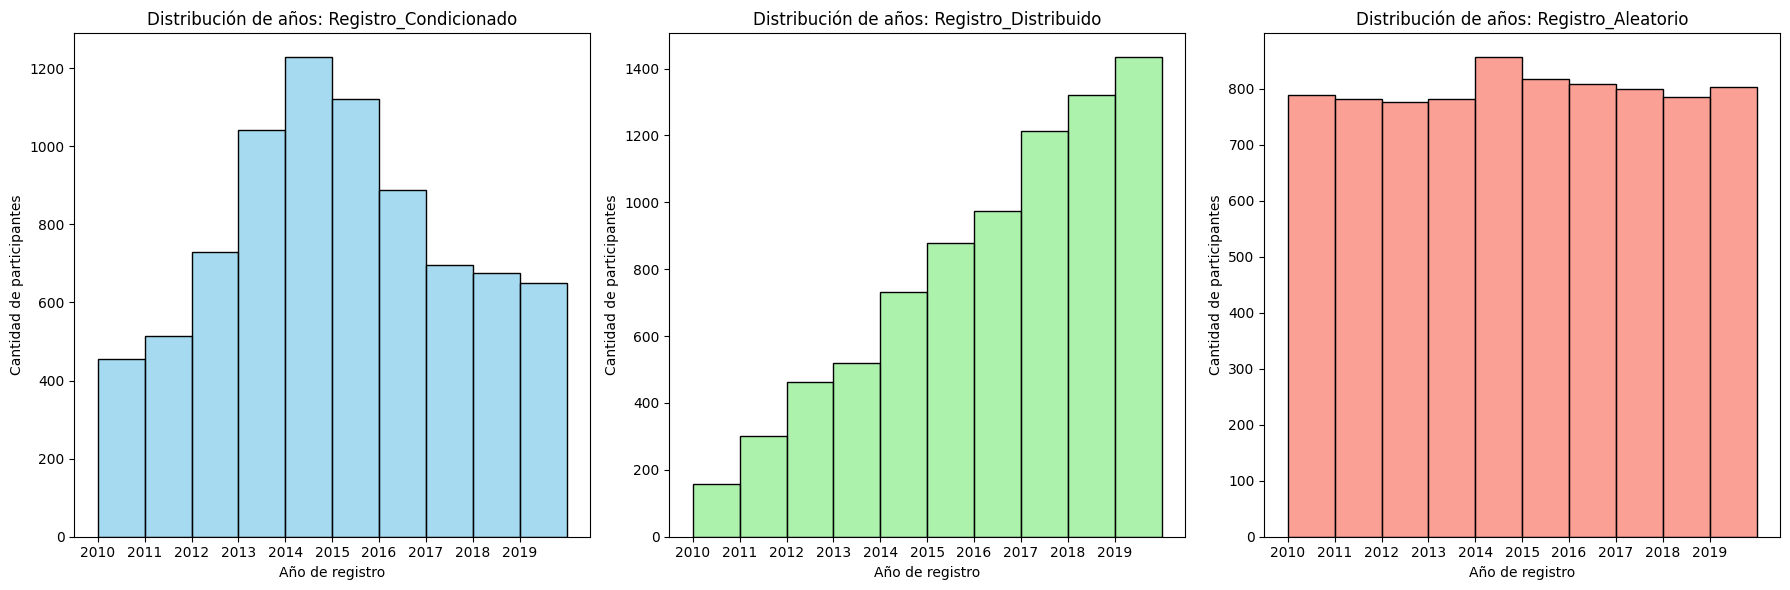

In [20]:
# 1. Registro condicionado (basado en tipo diabetes, IMC, PAS)
def asignar_registro_condicionado(row):
       
    # Base score normalizado de variables relevantes
    edad_norm = row['Edad'] / 100
    imc_norm = row['IMC'] / 50
    hba1c_norm = row['HbA1c'] / 15
    pas_norm = row['PAS'] / 200
    pad_norm = row['PAD'] / 150
    trig_norm = row['Trigliceridos'] / 500
    
    # Score combinado ponderado (ajustar pesos si quieres)
    score = (
        0.25 * edad_norm +
        0.20 * imc_norm +
        0.20 * hba1c_norm +
        0.15 * pas_norm +
        0.10 * pad_norm +
        0.10 * trig_norm
    )
    
    # Introducimos ruido normal con media 0 y desviaci√≥n ajustada
    ruido = np.random.normal(loc=0, scale=0.1)
    
    # Ajustamos el score con ruido (menos dependencia fuerte)
    score_ajustado = score + ruido
    
    # Escalamos score_ajustado al rango 2010-2019
    # Limitar el rango de score esperado para hacer la interpolaci√≥n:
    min_score = 0  # lo m√°s bajo posible si variables cerca de 0
    max_score = 1  # lo m√°ximo posible (aprox, variables normalizadas)
    
    # Clip para evitar valores fuera de rango antes de interpolar
    score_clip = max(min(score_ajustado, max_score), min_score)
    
    year = int(np.interp(score_clip, [min_score, max_score], [2010, 2019]))
    
    # Ajustes espec√≠ficos seg√∫n tipo de diabetes para darle m√°s realismo
    if row['Tipo_Diabetes'] == 'Tipo 2':
        # Tipo 2 tiende a a√±os m√°s recientes (m√°s peso para a√±os >= 2014)
        year = max(year, np.random.randint(2014, 2020))
    elif row['Tipo_Diabetes'] == 'Tipo 1':
        # Tipo 1 en rango medio (2010-2017)
        year = np.clip(year, 2010, 2017)
    else:
        # No diabetes en rango m√°s antiguo (2010-2015)
        year = min(year, np.random.randint(2010, 2016))
    
    return year

df['Registro_Condicionado'] = df.apply(asignar_registro_condicionado, axis=1)

# 2. Registro aleatorio con probabilidad creciente hacia a√±os recientes (2010-2019)
years = np.arange(2010, 2020)
# Probabilidades lineales: menor en 2010, mayor en 2019
probabilities = np.linspace(0.1, 1, len(years))
probabilities /= probabilities.sum()  # Normalizar a 1

df['Registro_Distribuido'] = np.random.choice(years, size=len(df), p=probabilities)

# 3. Registro aleatorio (uniforme)
df['Registro_Aleatorio'] = np.random.randint(2010, 2020, size=len(df))


# Visualizar distribuciones

plt.figure(figsize=(18,6))

# Histograma Registro_Condicionado
plt.subplot(1, 3, 1)
sns.histplot(df['Registro_Condicionado'], bins=range(2010, 2021), color='skyblue', kde=False)
plt.title('Distribuci√≥n de a√±os: Registro_Condicionado')
plt.xlabel('A√±o de registro')
plt.ylabel('Cantidad de participantes')
plt.xticks(range(2010, 2020))

# Histograma Registro_Distribuido
plt.subplot(1, 3, 2)
sns.histplot(df['Registro_Distribuido'], bins=range(2010, 2021), color='lightgreen', kde=False)
plt.title('Distribuci√≥n de a√±os: Registro_Distribuido')
plt.xlabel('A√±o de registro')
plt.ylabel('Cantidad de participantes')
plt.xticks(range(2010, 2020))

# Histograma Registro_Aleatorio
plt.subplot(1, 3, 3)
sns.histplot(df['Registro_Aleatorio'], bins=range(2010, 2021), color='salmon', kde=False)
plt.title('Distribuci√≥n de a√±os: Registro_Aleatorio')
plt.xlabel('A√±o de registro')
plt.ylabel('Cantidad de participantes')
plt.xticks(range(2010, 2020))


plt.tight_layout()
plt.show()


In [21]:
# Eliminar columnas del registro condicionado y proporcionalmente distribuido
df.drop(['Registro_Condicionado', 'Registro_Distribuido'], axis=1, inplace=True)

# Cambiar el nombre de 'Registro_Aleatorio' a 'Registro'
df.rename(columns={'Registro_Aleatorio': 'Registro'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Edad              8000 non-null   int32  
 1   Cuartil_Edad      8000 non-null   object 
 2   Sexo              8000 non-null   object 
 3   Tipo_Diabetes     8000 non-null   object 
 4   IMC               8000 non-null   float64
 5   HbA1c             8000 non-null   float64
 6   Insulina          8000 non-null   float64
 7   Colesterol_Total  8000 non-null   float64
 8   LDL               8000 non-null   float64
 9   HDL               8000 non-null   float64
 10  Trigliceridos     8000 non-null   float64
 11  PAS               8000 non-null   float64
 12  PAD               8000 non-null   float64
 13  Registro          8000 non-null   int32  
dtypes: float64(9), int32(2), object(3)
memory usage: 812.6+ KB


In [22]:
df

Edad Cuartil_Edad    Sexo Tipo_Diabetes   IMC  HbA1c  Insulina  \
0       43           Q2   Mujer        Tipo 2  36.7   8.52    194.12   
1       67           Q4   Mujer        Tipo 1  30.0   6.94      0.00   
2       55           Q3   Mujer        Tipo 2  34.7   6.20    100.56   
3       50           Q3   Mujer        Tipo 2  28.1   6.85     87.05   
4       35           Q1   Mujer        Tipo 2  32.9   6.55    155.21   
...    ...          ...     ...           ...   ...    ...       ...   
7995    40           Q2  Hombre        Tipo 1  27.9   5.84      4.45   
7996    38           Q1  Hombre        Tipo 2  33.0   7.81     79.93   
7997    46           Q2  Hombre        Tipo 1  25.9   7.37     12.61   
7998    63           Q4   Mujer        Tipo 1  21.4   8.10      0.39   
7999    33           Q1   Mujer   No diabetes  23.2   5.02     16.84   

      Colesterol_Total     LDL    HDL  Trigliceridos    PAS   PAD  Registro  
0               222.24  129.79  47.16         167.35  149.8  94.3      2017  
1               217.42  121.33  60.05         122.24  152.7  85.0      2013  
2               219.90  132.84  54.86         136.30  155.3  93.7      2015  
3               245.20  141.09  46.95         186.89  145.0  89.5      2015  
4               229.99  131.17  43.23         166.42  135.2  83.5      2011  
...                ...     ...    ...            ...    ...   ...       ...  
7995            210.75   96.23  53.87         134.36  129.3  81.8      2017  
7996            226.15  107.71  43.00         158.55  135.6  90.3      2012  
7997            215.13  103.98  50.24         115.98  130.2  82.9      2012  
7998            228.54  108.89  54.81         144.61  146.3  82.7      2016  
7999            208.13  118.08  52.14         125.33  111.2  80.0      2017  

[8000 rows x 14 columns]

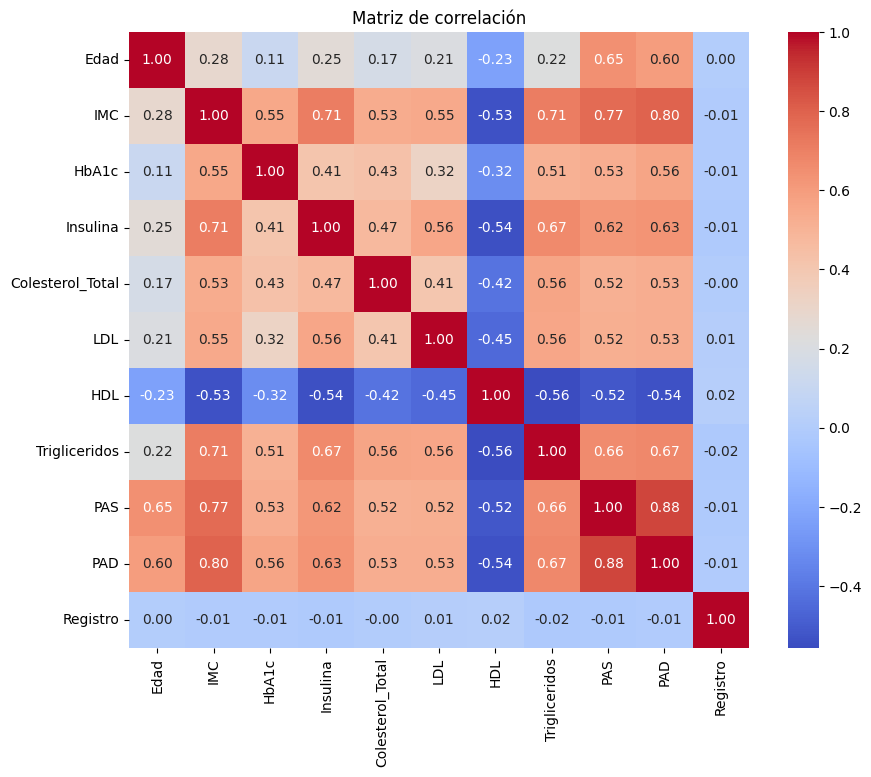

In [23]:
# Matriz de correlaci√≥n (var num√©ricas)

corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlaci√≥n")
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Edad              8000 non-null   int32  
 1   Cuartil_Edad      8000 non-null   object 
 2   Sexo              8000 non-null   object 
 3   Tipo_Diabetes     8000 non-null   object 
 4   IMC               8000 non-null   float64
 5   HbA1c             8000 non-null   float64
 6   Insulina          8000 non-null   float64
 7   Colesterol_Total  8000 non-null   float64
 8   LDL               8000 non-null   float64
 9   HDL               8000 non-null   float64
 10  Trigliceridos     8000 non-null   float64
 11  PAS               8000 non-null   float64
 12  PAD               8000 non-null   float64
 13  Registro          8000 non-null   int32  
dtypes: float64(9), int32(2), object(3)
memory usage: 812.6+ KB


In [25]:
# Exportar el df como archivo csv
df.to_csv('db_diabetes.csv', index=False)
print("‚úÖ Datos guardados en 'db_diabetes.csv'.")

‚úÖ Datos guardados en 'db_diabetes.csv'.
